<a href="https://colab.research.google.com/github/khuloodnasher/dsc-capstone-project-v2-onl01-dtsc-ft-030220/blob/master/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Sentiment Analysis of : 
## Proclamation Suspending Entry of Aliens Who Present a Risk to the U.S. Labor Market Following the Coronavirus Outbreak

[Source](https://www.whitehouse.gov/presidential-actions/proclamation-suspending-entry-aliens-present-risk-u-s-labor-market-following-coronavirus-outbreak/)
##  Introduction
### Define The Probelm

Background


On June 22, 2020, president Donald Trump issued a proclamation titled: 

Proclamation Suspending Entry of Aliens Who Present a Risk to the U.S. Labor Market Following the Coronavirus Outbreak. 

This proclomation has gone into effect 12:01 a.m. eastern daylight time on June 24, 2020. This proclamation suspended entry of new immigrants who do not already have an approved immigrant visa. It was originally valid for 60 days, until June 22, 2020. 

The new proclamation extends the period for an additional 4 months, until December 31, 2020. 

Section 2 of the proclamation suspends
 any alien seeking entry pursuant to any of the following nonimmigrant visas entry into the United States until 
December 31, 2020.

 Subject to section 3 of the proclamation: 
 
  H-1B or H-2B visa, and any alien accompanying or following to join such alien;
  
a J visa, to the extent the alien is participating in an intern, trainee, teacher, camp counselor, au pair, or summer work travel program, and any alien accompanying or following to join such alien.

an L visa, and any alien accompanying or following to join such alien.




# Main Questions:
1- What do people think about proclamation June22?  

2- What aspects get the most negative mentions? 

3- What aspects get the most positive mentions? 

To answer those questions, I performed twitter sentiment analysis. I collected tweets during the period from June 26-July  25 2020.

Sentiments of the  public were collected by tracing the following hashtags:

# H2bvisa

# h4visa

# Lvisa

# J1 Visa

# h1bvisa

# workvisa

I collected weekly tweets of the above hashtags using the following website:
https://www.vicinitas.io/free-tools/download-search-tweets?tracker=%23+h1p+visa

Where an excel reoprt was downloaded and proccessed as acsv file. Columns of tweetId, and tweets were used for my sentiment analysis.

On my sentiment analysis, I pursed the data science approch i.e. known as: (OSEMN) which is abbreviation for :Obtain data, Scrub Data, Explore Data, Model Data , and Finally interpret  Data as following:


# Imported Libraries.

In [ ]:
# nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import FreqDist

# Preprocessing
import re
import string
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd
import numpy as np
import os

# Modeling
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Wordcloud
from wordcloud import WordCloud, STOPWORDS 

#Pillow
from PIL import Image
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import sys
import pandas as pd

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/li

In [ ]:
## To display  all the interactive output without using the print function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Define Metrics Function

In [ ]:
### define function for plotting confusion matrix
def plot_confusion_matrix(y_test, y_hat_test):
 # '''
   # First Function for Plotting Confusion Matrix
    #Second Function to Calculate and displays the following: Train and Test Score, Classification Report, 
   # and Confusion Matrix.
    
       # Parameters:
            
          #  clf: classifier or instanciated model from run_model function
          #  y_train: y train from test, train, split
           # y_test: y test from test, train, split
          #  y_hat_test: y hat test from run_model fuction
            
   # '''
    # Print confusion matrix
  cnf_matrix = confusion_matrix(y_test, y_hat_test)
    # Create the basic matrix
  plt.imshow(cnf_matrix,  cmap=plt.cm.Blues)
    # Add title and axis labels
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
    # Add appropriate axis scales
  class_names = set(y) # Get class labels to add to matrix
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=0)
  plt.yticks(tick_marks, class_names)
    # Add labels to each cell
  thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization
  for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
           horizontalalignment='center',
          color='white' if cnf_matrix[i, j] > thresh else 'black')
    # Add a legend
    plt.colorbar();
    plt.show();
   
def evaluate_model(clf, y_train, y_test, y_hat_train, y_hat_test):
    '''Print out the evaluation metrics for a given models predictions'''
    print(f'Classifier: {clf}', )
    print('-'*60)
    plot_confusion_matrix(y_test,y_hat_test)
    print(f'test accuracy: {accuracy_score(y_test, y_hat_test)}')
    print(f'train accuracy: {accuracy_score(y_train, y_hat_train)}')
    print('-'*60)
    print('-'*60)
    print('Confusion Matrix:\n', pd.crosstab(y_test, y_hat_test, rownames=['Actual'], colnames=['Predicted'],margins = True))
    print('\ntest report:\n' + classification_report(y_test, y_hat_test))
    print('~'*60)
    return [classification_report(y_test, y_hat_test)]
    

In [ ]:
### define our metrics function with plotting confusion matrix
import itertools
from sklearn.metrics import confusion_matrix 

### define function for plotting confusion matrix
def plot_confusion_matrix(y_test, y_hat_test):
  
    # Print confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_hat_test)
    # Create the basic matrix
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues)
    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Add appropriate axis scales
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names)
    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    # Add a legend
    plt.colorbar();
    plt.show();
   
def evaluate_model(clf, y_train, y_test, y_hat_train, y_hat_test):
    '''Print out the evaluation metrics for a given models predictions'''
    print(f'Classifier: {clf}', )
    print('-'*60)
    plot_confusion_matrix(y_test,y_hat_test)
    print(f'test accuracy: {accuracy_score(y_test, y_hat_test)}')
    print(f'train accuracy: {accuracy_score(y_train, y_hat_train)}')
    print('-'*60)
    print('-'*60)
    print('Confusion Matrix:\n', pd.crosstab(y_test, y_hat_test, rownames=['Actual'], colnames=['Predicted'],margins = True))
    print('\ntest report:\n' + classification_report(y_test, y_hat_test))
    print('~'*60)
    return [accuracy_score(y_test, y_hat_test), classification_report(y_test, y_hat_test)]
    

# Connecting google Colab to google Deive to upload data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Obtain Data

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import sys
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/proclomation.csv', encoding= 'ISO-8859-1')


In [ ]:
df.head()
df.info()

Tweet Id                                              tweet  label
0  1.280000e+18  RT @behindwoods : #TCS, #Infosys and #TechMahi...    0.0
1  1.280000e+18  #TCS, #Infosys and #TechMahindra come up with ...    0.0
2  1.280000e+18  RT @MarkSKrikorian : .@realDonaldTrump is the ...    1.0
3  1.280000e+18  RT @UpskillC : #Skills trump college degree.  ...    0.0
4  1.280000e+18  #Skills trump college degree.  "President Dona...    0.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9018 entries, 0 to 9017
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tweet Id  9018 non-null   float64
 1   tweet     9018 non-null   object 
 2   label     9017 non-null   float64
dtypes: float64(2), object(1)
memory usage: 211.5+ KB


# Scrub Data
### To clean the tweets:

1- cleaning the punctuation through string.punctuation.

2- cleaning the stop words through removing English Stopwords.

3- Adding extended lists of removing more unwanted words such as http,amber,rt,RT.

4- keeping important symbols such as "#" and "@"

5- Regex function was used in cleaning.

6- Applying the cleaning functions, so tweets will be tokenized as single words separated by space meaning they are tokens.

7- Joining the tokenized tweets to String, that will make them list of strings

8- convert the cleaning list of tweet strings to dataframe.




In [ ]:
import nltk
nltk.download("stopwords")

# Make a list of stopwords to remove
from nltk.corpus import stopwords
import string
# Get all the stop words in the English language
stopwords_list = stopwords.words('english')
stopwords_list
# add customized stopwords from my dataset
additional_words = ['“','”','...','``',"''",'’',"httpst",'amp',"theto","}",
                    "{","rt",".codgy3azxwOY","http:","https:","RT" ,"rt"]
   

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
## Add punctuation to stopwords_list
stopwords_list+=string.punctuation
## extend the additional_words to stopwords_list
stopwords_list.extend(additional_words)
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# keeping #,@
print(len(stopwords_list))
stopwords_list2 = []
for x in stopwords_list:
  if x not in ['#', '@']:
    stopwords_list2.append(x)
print(len(stopwords_list2))
stopwords_list2# stopwords_list2 is going to be my customized stopwords list i'm going to work with in my project

228
226


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Create a pipeline to remove stop-words, punctuation, and perform tokenization
def message_cleaning(message):
  ''' pipeline function performs the follwoing:
  (1) remove punctiation,
  (2) remove stopwords'''


  Test_punc_removed=[char for char in message if char not in string.punctuation]
  Test_punc_removed_join=''.join(Test_punc_removed)
  Test_punc_removed_join_clean=[word for word in Test_punc_removed_join.split() if word.lower() not in stopwords_list2 ]
  return Test_punc_removed_join_clean

In [ ]:
# let's test the newly added function
df_clean=df['tweet'].apply(message_cleaning)
df_clean.head()
print(df_clean[5]) # cleaning tweet in index 5

0    [behindwoods, TCS, Infosys, TechMahindra, come...
1    [TCS, Infosys, TechMahindra, come, solutions, ...
2    [MarkSKrikorian, realDonaldTrump, first, presi...
3    [UpskillC, Skills, trump, college, degree, Pre...
4    [Skills, trump, college, degree, President, Do...
Name: tweet, dtype: object

['natlawreview', 'Update', 'Implementation', 'June', '22', '2020', 'Presidential', 'Proclamation', 'Restricting', 'H', 'L', 'J', 'Entry', 'United', 'States', 'httpstcoKQTKObaVnW', 'MintzLaw', 'NonImmigrants', 'VisaBan', 'H1B']


In [ ]:
df_cleaner = [" ".join(x) for x in df_clean]# return the tokinized tweet to list of strings i.e. sentence


In [ ]:
# convert the list of strings of tweets into dataframe
new_df = pd.DataFrame(df_cleaner, columns=["tweet"])
new_df.head()

tweet
0  behindwoods TCS Infosys TechMahindra come solu...
1  TCS Infosys TechMahindra come solutions tackle...
2  MarkSKrikorian realDonaldTrump first president...
3  UpskillC Skills trump college degree President...
4  Skills trump college degree President Donald T...

# Labeling Tweets:
* About 9018 tweets were collected and cleaned.

* One third of the tweets were manually labeled. The tweet was labelled positive(1) if it supports the proclamation, negative(-1) if it refuses the proclamation, and neutral  (0) if it doesn't show any feeling or stand toward the proclamation such as sharing neutral news as a source of information.

* List of positive words and negative words were provided.

* Function was defined  where  a compiler was created from the regex library which creates patterns of all positive and negative words.

* The sentiment analyzer function was applied then on all the collected cleaned tweets and the tweets were labelled



In [ ]:
# Define sentiment analaysis function to help with labeling tweets
def sentimentanlayze(tweet):
  '''  function to label tweets into positive or negative or neutral 
      through feeding it with list of positive word and list of 
      negative words and by using a regex compiler to create a pattern of 
      positive, negarive, and neutral words and piping the words to search 
      in all tweets '''
  
  
  # my positive list of words
  postive=[
"diversity",
"blacklivesmatter",
"blm",
"ernestMEdsel1",
"telugu",
"scam",
"stealing",
"visa reform",
"vbierschwale",
"denied",
"deny ",
#"american",
#"americans",
"greedy",
"support trump",
"#americafirst",
"outsourcing",
"college grads",
"david_j_bier",
"reduce h1b visas",
"american jobs",
"end h1bvisa",
"cheap",
"endh1",
"end h1b",
"denying",
"ends386",
"cocacha31775669",
"wcwoa",
"illegal",
"parasite",
"stops386",
"ivankatrump",
"expandtheban",
"thank you",
"frankdc17",
"@amworkco",
"amworkco",
"leader",
" overwork",
"#bigtech",
"pray",
"#nepotism",
"@wcwoa",
"fighting",
"foreigners",
"first president",
"@CommerceGov",
"screwing",
"do not like",
"replacements",
"displacing"
"merit",
"cursed "
"potus",
"add thousands",
"migration",
"extend",
"army",
"security",
"medical",
"charged",
"protect",
"positions",
"foreign",
"charged",
"fraud",
"liberation",
"@AmWorkCo",
"access",
"sideline",
"nebraska",
"2016 campaign",
"foreign-born",
"silicon valley"
]

# my negative list of words
  negative=[
"behdwoods",
"skilled",
"children",
"family",
"herretostay",
"moratorium",
"orange man",
"dissapointed",
"suicide",
"blocking" ,
"savej1",
"s386isfair",
"sanjeev93882222",
"cesifoti",
"alicegwells",
"attract",
"american dream",
"process easier",
"easier process",
"dwhiteheadsel",
"hurt",
"innovation",
"liberty_immigrn",
"sick"
 "moratorium",
 "wjraghu", 
 "wrong direction"
 "trumpÕs",
"fwdus",
"please",
"exceptional",
"training"
,"liberty_immigrn",
"wjraghu",
"hardworking",
 "PassS386",
 "Canada",
 "separated",
 "cancellation",
 "expert",
 "cloud",
 "haroun",
 "Professor",
 "delay",
"recovery "
"paediatriccardiology",
"nebraska",
"take action",
" abolish",
"savej1" ,
" au pair ",
" exchange visitor",
"remove",
" petition",
 "visa ban",
 "Senatordurbin"
 
]
  a = re.compile("("+"|" .join(negative)+")+", re.IGNORECASE) #|  means 'or ' in regular expression 
  if len(a.findall(tweet))>0:# word is included in the list
    return -1
  a = re.compile("("+"|" .join(postive)+")+", re.IGNORECASE) # create complier for the list of postive, to create pattern of all postive words 
  if len(a.findall(tweet))>0: # check in tweet with using the complier
    return 1

  return 0


In [ ]:
# applying my function on not clean tweets and creating new labeled values

df['new_label']=[sentimentanlayze(x) for x in list(df["tweet"])] 
df.head(50)

Tweet Id  ... new_label
0   1.280000e+18  ...         0
1   1.280000e+18  ...         0
2   1.280000e+18  ...         1
3   1.280000e+18  ...         0
4   1.280000e+18  ...         0
5   1.280000e+18  ...         0
6   1.280000e+18  ...         0
7   1.280000e+18  ...         1
8   1.280000e+18  ...         0
9   1.280000e+18  ...         1
10  1.280000e+18  ...        -1
11  1.280000e+18  ...         1
12  1.280000e+18  ...         1
13  1.280000e+18  ...         1
14  1.280000e+18  ...         0
15  1.280000e+18  ...         1
16  1.280000e+18  ...         1
17  1.280000e+18  ...         0
18  1.280000e+18  ...         1
19  1.280000e+18  ...         1
20  1.280000e+18  ...         1
21  1.280000e+18  ...         1
22  1.280000e+18  ...         0
23  1.280000e+18  ...        -1
24  1.280000e+18  ...         1
25  1.280000e+18  ...         1
26  1.280000e+18  ...        -1
27  1.280000e+18  ...         1
28  1.280000e+18  ...         1
29  1.280000e+18  ...        -1
30  1.280000e+18  ...         0
31  1.280000e+18  ...        -1
32  1.280000e+18  ...        -1
33  1.280000e+18  ...         0
34  1.280000e+18  ...         1
35  1.280000e+18  ...         0
36  1.280000e+18  ...         1
37  1.280000e+18  ...         1
38  1.280000e+18  ...         1
39  1.280000e+18  ...        -1
40  1.280000e+18  ...         1
41  1.280000e+18  ...         1
42  1.280000e+18  ...         1
43  1.280000e+18  ...         1
44  1.280000e+18  ...        -1
45  1.280000e+18  ...        -1
46  1.280000e+18  ...         1
47  1.280000e+18  ...         1
48  1.280000e+18  ...         1
49  1.280000e+18  ...         1

[50 rows x 4 columns]

In [ ]:
# rename columns
df.rename(columns = {'label':'manaual_label','new_label':'function_label' }, inplace = True) 
df.head(50)
df.info()
   

Tweet Id  ... function_label
0   1.280000e+18  ...              0
1   1.280000e+18  ...              0
2   1.280000e+18  ...              1
3   1.280000e+18  ...              0
4   1.280000e+18  ...              0
5   1.280000e+18  ...              0
6   1.280000e+18  ...              0
7   1.280000e+18  ...              1
8   1.280000e+18  ...              0
9   1.280000e+18  ...              1
10  1.280000e+18  ...             -1
11  1.280000e+18  ...              1
12  1.280000e+18  ...              1
13  1.280000e+18  ...              1
14  1.280000e+18  ...              0
15  1.280000e+18  ...              1
16  1.280000e+18  ...              1
17  1.280000e+18  ...              0
18  1.280000e+18  ...              1
19  1.280000e+18  ...              1
20  1.280000e+18  ...              1
21  1.280000e+18  ...              1
22  1.280000e+18  ...              0
23  1.280000e+18  ...             -1
24  1.280000e+18  ...              1
25  1.280000e+18  ...              1
26  1.280000e+18  ...             -1
27  1.280000e+18  ...              1
28  1.280000e+18  ...              1
29  1.280000e+18  ...             -1
30  1.280000e+18  ...              0
31  1.280000e+18  ...             -1
32  1.280000e+18  ...             -1
33  1.280000e+18  ...              0
34  1.280000e+18  ...              1
35  1.280000e+18  ...              0
36  1.280000e+18  ...              1
37  1.280000e+18  ...              1
38  1.280000e+18  ...              1
39  1.280000e+18  ...             -1
40  1.280000e+18  ...              1
41  1.280000e+18  ...              1
42  1.280000e+18  ...              1
43  1.280000e+18  ...              1
44  1.280000e+18  ...             -1
45  1.280000e+18  ...             -1
46  1.280000e+18  ...              1
47  1.280000e+18  ...              1
48  1.280000e+18  ...              1
49  1.280000e+18  ...              1

[50 rows x 4 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9018 entries, 0 to 9017
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tweet Id        9018 non-null   float64
 1   tweet           9018 non-null   object 
 2   manaual_label   9017 non-null   float64
 3   function_label  9018 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 281.9+ KB


# Explore Data
* Visualize tweet class distribution

* Generate Wordclouds for tweet classes

* Generate word frequency distribution plots for tweet classes

* Visualize Distribution of Tweet Length based on number of characters.

* Visualize Distribution of Tweet Token Length

In [ ]:
# Converting labeles to object
df['sentiment'] = df['function_label'].astype('str')
df['sentiment'] = df['sentiment'].apply(lambda x: x.strip().replace("-1", "negative").replace("0", "neutral").replace("1","positive"))
df.head(50)

Tweet Id  ... sentiment
0   1.280000e+18  ...   neutral
1   1.280000e+18  ...   neutral
2   1.280000e+18  ...  positive
3   1.280000e+18  ...   neutral
4   1.280000e+18  ...   neutral
5   1.280000e+18  ...   neutral
6   1.280000e+18  ...   neutral
7   1.280000e+18  ...  positive
8   1.280000e+18  ...   neutral
9   1.280000e+18  ...  positive
10  1.280000e+18  ...  negative
11  1.280000e+18  ...  positive
12  1.280000e+18  ...  positive
13  1.280000e+18  ...  positive
14  1.280000e+18  ...   neutral
15  1.280000e+18  ...  positive
16  1.280000e+18  ...  positive
17  1.280000e+18  ...   neutral
18  1.280000e+18  ...  positive
19  1.280000e+18  ...  positive
20  1.280000e+18  ...  positive
21  1.280000e+18  ...  positive
22  1.280000e+18  ...   neutral
23  1.280000e+18  ...  negative
24  1.280000e+18  ...  positive
25  1.280000e+18  ...  positive
26  1.280000e+18  ...  negative
27  1.280000e+18  ...  positive
28  1.280000e+18  ...  positive
29  1.280000e+18  ...  negative
30  1.280000e+18  ...   neutral
31  1.280000e+18  ...  negative
32  1.280000e+18  ...  negative
33  1.280000e+18  ...   neutral
34  1.280000e+18  ...  positive
35  1.280000e+18  ...   neutral
36  1.280000e+18  ...  positive
37  1.280000e+18  ...  positive
38  1.280000e+18  ...  positive
39  1.280000e+18  ...  negative
40  1.280000e+18  ...  positive
41  1.280000e+18  ...  positive
42  1.280000e+18  ...  positive
43  1.280000e+18  ...  positive
44  1.280000e+18  ...  negative
45  1.280000e+18  ...  negative
46  1.280000e+18  ...  positive
47  1.280000e+18  ...  positive
48  1.280000e+18  ...  positive
49  1.280000e+18  ...  positive

[50 rows x 5 columns]

In [ ]:
 # applying my function on the clean tweets and creating new labeled values

new_df["label"] = [sentimentanlayze(x) for x in list(new_df["tweet"])]
new_df.head(30)

tweet  label
0   behindwoods TCS Infosys TechMahindra come solu...      0
1   TCS Infosys TechMahindra come solutions tackle...      0
2   MarkSKrikorian realDonaldTrump first president...      1
3   UpskillC Skills trump college degree President...      0
4   Skills trump college degree President Donald T...      0
5   natlawreview Update Implementation June 22 202...      0
6   orfonline Suspension H1B Ñ India likelihood do...      0
7   AmWorkCo Thank realDonaldTrump taking first st...      1
8   Suspension H1B Ñ India likelihood downplay mov...      0
9   AmWorkCo hope pray realDonaldTrump enact solid...      1
10  wjraghu sick immigration moratorium thereÕs op...     -1
11  sylviak70097773 got rid H1b 3 million American...      1
12  MarkSKrikorian realDonaldTrump first president...      1
13  MarkSKrikorian realDonaldTrump first president...      1
14  IndiaToday Heres H1B visa suspension Trump gov...      0
15  MarkSKrikorian realDonaldTrump first president...      1
16  NeilMunroDC Twothirds young techworkers Silico...      1
17  Investors migrate families US 6 months investi...      0
18  NeilMunroDC majesticprimate Good progress damn...      0
19  STruthpills Nah Minimum 500K BigTech 200K fire...      1
20  got rid H1b 3 million Americans unemployed wou...      1
21  gracemarg3 realDonaldTrump ExpandTheBan h1b ne...      1
22  NeilMunroDC Pres Trumps big H1B visa worker re...      0
23  H1B visa ban1000s Indians might hv otherwise d...     -1
24  gracemarg3 expandtheban h1b realdonaltrump Cit...      1
25  ErnestMEdsel1 lordcurzon Whats special bring T...      1
26  wjraghu sick immigration moratorium thereÕs op...     -1
27  MarkSKrikorian realDonaldTrump first president...      1
28  SpeakSamuel H1B tech workers earn US tech work...      1
29  FWDus President TrumpÕs ban immigrant workers ...     -1

In [ ]:
# create new labele  object column
new_df['sentiment'] = new_df['label'].astype('str')
new_df['sentiment'] = new_df['sentiment'].apply(lambda x: x.strip().replace("-1", "negative").replace("0", "neutral").replace("1","positive"))
new_df.head(50)



tweet  label sentiment
0   behindwoods TCS Infosys TechMahindra come solu...      0   neutral
1   TCS Infosys TechMahindra come solutions tackle...      0   neutral
2   MarkSKrikorian realDonaldTrump first president...      1  positive
3   UpskillC Skills trump college degree President...      0   neutral
4   Skills trump college degree President Donald T...      0   neutral
5   natlawreview Update Implementation June 22 202...      0   neutral
6   orfonline Suspension H1B Ñ India likelihood do...      0   neutral
7   AmWorkCo Thank realDonaldTrump taking first st...      1  positive
8   Suspension H1B Ñ India likelihood downplay mov...      0   neutral
9   AmWorkCo hope pray realDonaldTrump enact solid...      1  positive
10  wjraghu sick immigration moratorium thereÕs op...     -1  negative
11  sylviak70097773 got rid H1b 3 million American...      1  positive
12  MarkSKrikorian realDonaldTrump first president...      1  positive
13  MarkSKrikorian realDonaldTrump first president...      1  positive
14  IndiaToday Heres H1B visa suspension Trump gov...      0   neutral
15  MarkSKrikorian realDonaldTrump first president...      1  positive
16  NeilMunroDC Twothirds young techworkers Silico...      1  positive
17  Investors migrate families US 6 months investi...      0   neutral
18  NeilMunroDC majesticprimate Good progress damn...      0   neutral
19  STruthpills Nah Minimum 500K BigTech 200K fire...      1  positive
20  got rid H1b 3 million Americans unemployed wou...      1  positive
21  gracemarg3 realDonaldTrump ExpandTheBan h1b ne...      1  positive
22  NeilMunroDC Pres Trumps big H1B visa worker re...      0   neutral
23  H1B visa ban1000s Indians might hv otherwise d...     -1  negative
24  gracemarg3 expandtheban h1b realdonaltrump Cit...      1  positive
25  ErnestMEdsel1 lordcurzon Whats special bring T...      1  positive
26  wjraghu sick immigration moratorium thereÕs op...     -1  negative
27  MarkSKrikorian realDonaldTrump first president...      1  positive
28  SpeakSamuel H1B tech workers earn US tech work...      1  positive
29  FWDus President TrumpÕs ban immigrant workers ...     -1  negative
30  NeilMunroDC Pres Trumps big H1B visa worker re...      0   neutral
31  wjraghu sick immigration moratorium thereÕs op...     -1  negative
32  wjraghu sick immigration moratorium thereÕs op...     -1  negative
33  Investors migrate families US 4 months investi...      0   neutral
34  rebaliza4 httpstcosln4pitzou Microsoft HIRE IN...      1  positive
35  SpeakSamuel Heres detailed breakdown company s...      0   neutral
36  SpeakSamuel H1B tech workers earn US tech work...      1  positive
37  WCWOA 1 BLaw Federal Government agencies using...      1  positive
38  WCWOA incredibly important AmericanWorkers rea...      1  positive
39  sanjeev93882222 Dear SenatorDurbin please thin...     -1  negative
40  MarkSKrikorian realDonaldTrump first president...      1  positive
41  MarkSKrikorian realDonaldTrump first president...      1  positive
42  SenSasse SenatorFischer JeffFortenberry RepDon...      1  positive
43  WCWOA 1 BLaw Federal Government agencies using...      1  positive
44  libertyimmigrn Yes labor shortage US shortage ...     -1  negative
45  wjraghu sick immigration moratorium thereÕs op...     -1  negative
46  FrankDC17 fight Democrats vs Republicans White...      1  positive
47  SpeakSamuel H1B tech workers earn US tech work...      1  positive
48  WCWOA 1 BLaw Federal Government agencies using...      1  positive
49  WCWOA incredibly important AmericanWorkers rea...      1  positive

# Plotting Word Cloud

In [ ]:
from wordcloud import WordCloud 
# convert all  the tweets into a list 
sentences=new_df['tweet'].tolist()
# join all the sentences i.e. combining all the tweets in one massive string
sentences_as_one_string= " ".join(sentences) # join all data

sentences_as_one_string

'behindwoods TCS Infosys TechMahindra come solutions tackle H1B VisaBan businesses Jobs httpstcoXrIgtJuHhR TCS Infosys TechMahindra come solutions tackle H1B VisaBan businesses Jobs httpstcoXrIgtJuHhR MarkSKrikorian realDonaldTrump first president take steps prevent Americans replaced H1B guestworkers httpstcogrwi2axGkB via CISorg UpskillC Skills trump college degree President Donald Trump signed executive order Friday directing federal government prioritize job applicantsÕ skills education degree httpstco4VDpyaCpiz college degree realDonaldTrump jobs economy unemployment H1B Skills trump college degree President Donald Trump signed executive order Friday directing federal government prioritize job applicantsÕ skills education degree httpstco4VDpyaCpiz college degree realDonaldTrump jobs economy unemployment H1B natlawreview Update Implementation June 22 2020 Presidential Proclamation Restricting H L J Entry United States httpstcoKQTKObaVnW MintzLaw NonImmigrants VisaBan H1B orfonline 

# visualize negative cloud

<Figure size 1440x1440 with 0 Axes>

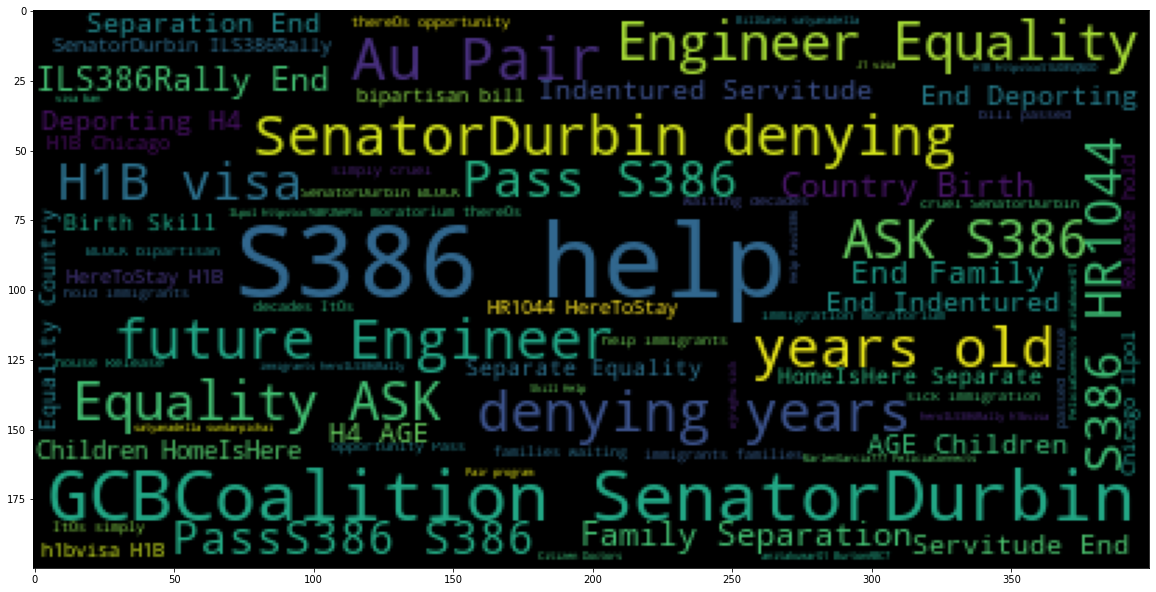

In [ ]:
# visualize negative cloud, convert negative tweets to a list
negatives = new_df[new_df.sentiment == "negative"]
negative_list=negatives['tweet'].tolist()
# join the list of tweets into a mssive string
negative_sentences_as_one_string=" ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))



# visualize positive cloud

<Figure size 1440x1440 with 0 Axes>

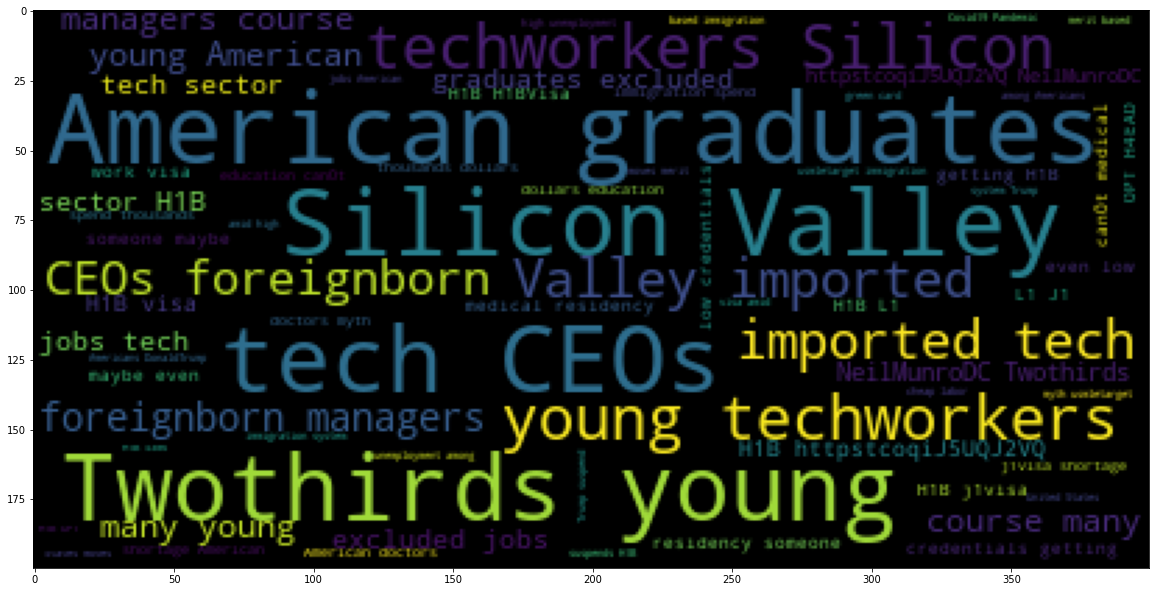

In [ ]:
# visualize positive cloud, convert positive tweets to a list
positives = new_df [new_df.sentiment == 'positive']
positive_list=positives['tweet'].tolist()
# join the list of tweets into a mssive string
positive_sentences_as_one_string=" ".join(positive_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_sentences_as_one_string))


# visualize neutral cloud

<Figure size 1440x1440 with 0 Axes>

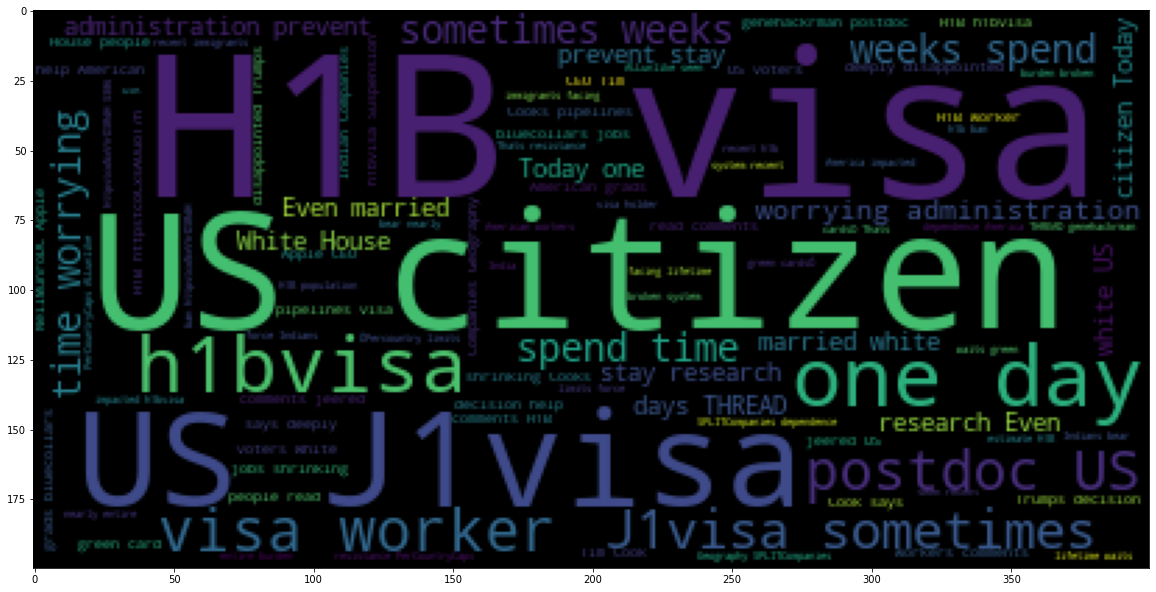

In [ ]:
# visualize positive cloud, convert positive tweets to a list
neutrals = new_df [new_df.sentiment == 'neutral']
neutral_list=neutrals['tweet'].tolist()
# join the list of tweets into a mssive string
neutral_sentences_as_one_string=" ".join(neutral_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neutral_sentences_as_one_string))


### lenght of each tweet

In [ ]:
# creating lenght column of each tweet based on number of characters
# to get the length of every tweet
new_df['length']=new_df['tweet'].apply(len)
new_df['length']

0       105
1        93
2       131
3       249
4       240
       ... 
9013    201
9014    201
9015    232
9016    232
9017    201
Name: length, Length: 9018, dtype: int64

*Token Length*

In [ ]:
# create "token length" feature.

new_df['token_length'] = [len(x.split(" ")) for x in new_df.tweet]
new_df.head()
max(new_df.token_length)

tweet  ...  token_length
0  behindwoods TCS Infosys TechMahindra come solu...  ...            12
1  TCS Infosys TechMahindra come solutions tackle...  ...            11
2  MarkSKrikorian realDonaldTrump first president...  ...            14
3  UpskillC Skills trump college degree President...  ...            29
4  Skills trump college degree President Donald T...  ...            28

[5 rows x 5 columns]

55

# Visualize Length of tweets in each class beased on number of characters.

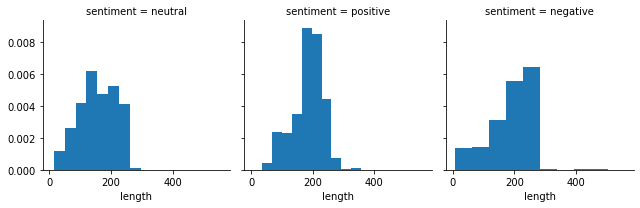

In [ ]:
# showing the distribution of tweet length in each sentiment based on number of character
a = sns.FacetGrid(new_df,col='sentiment')
a.map(plt.hist,'length', density=True)

# Visualize Token Length of tweets in each class.

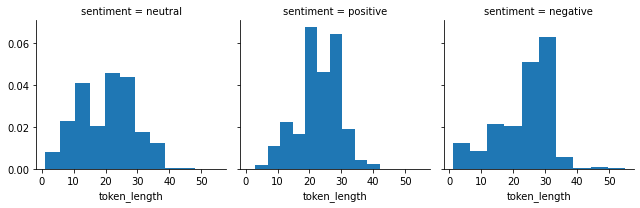

In [ ]:
# visualizing the distribution of tokens on each sentiment
token_l = sns.FacetGrid(new_df,col='sentiment')
token_l.map(plt.hist,'token_length', density=True)

# Visualize the Length Distribution of the tweets. 

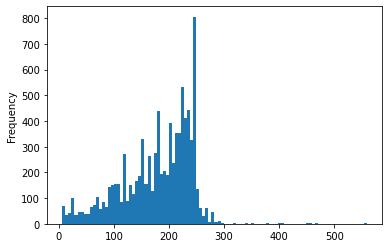

In [ ]:
# histogram plt of length
new_df['length'].plot(bins=100,kind='hist')

# Barplotting the sentiment category to the length of tweet

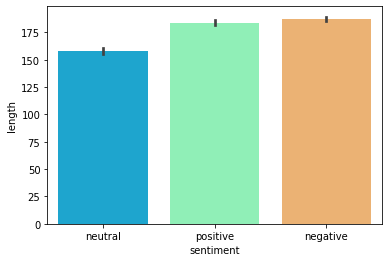

In [ ]:
#barplotting the sentiment category to the length of tweet i.e. on number of characters
sns.barplot(x='sentiment',y='length',data=new_df,palette='rainbow')

In [ ]:
# Identify target variables.

new_df['sentiment'].value_counts()

negative    4614
neutral     2228
positive    2176
Name: sentiment, dtype: int64

In [ ]:
# Identify target variables.

new_df['sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

# Identify the Three Labeles of Sentiments

In [ ]:
# check the number of neutral vs. negative  and positives tagged sentences
neutrals = new_df['label'][new_df.label == 0]
negatives = new_df['label'][new_df.label == -1]
positives =  new_df['label'][new_df.label == 1]

print('number of neutral tagged sentences is:  {}'.format(len(neutrals)))
print('number of negative tagged sentences is: {}'.format(len(negatives)))
print('number of positive tagged sentences is: {}'.format(len(positives)))
print('total length of the data is:            {}'.format(new_df.shape[0]))
new_df['sentiment'].value_counts()

number of neutral tagged sentences is:  2228
number of negative tagged sentences is: 4614
number of positive tagged sentences is: 2176
total length of the data is:            9018


negative    4614
neutral     2228
positive    2176
Name: sentiment, dtype: int64

#  Top 10 frequent words

In [ ]:
# Top 10 frequent words
df_list = new_df
        
# get most common words in training dataset
import collections
all_words = []
for line in list(new_df['tweet']):
  words = line.split()
  for word in words:
    all_words.append(word.lower())
    
collections.Counter(all_words).most_common(10)

[('h1b', 6662),
 ('us', 2597),
 ('h1bvisa', 2572),
 ('s386', 2117),
 ('visa', 1766),
 ('senatordurbin', 1653),
 ('help', 1598),
 ('american', 1584),
 ('jobs', 1562),
 ('end', 1375)]

Visualize Top 25 most common Words

<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Top 25 most common words')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

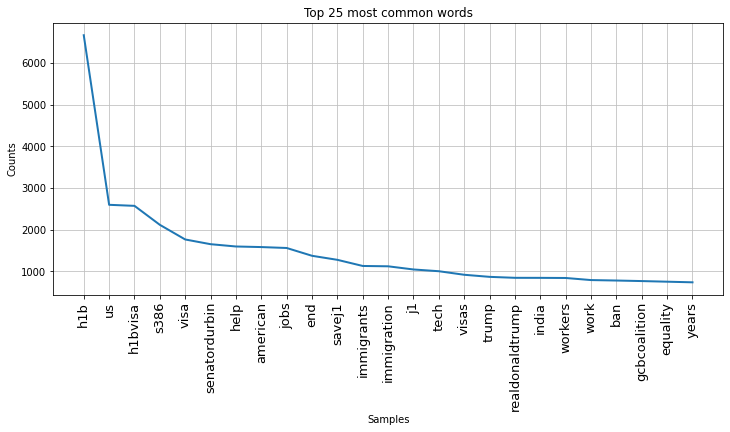

<Figure size 864x360 with 0 Axes>

Text(0, 0.5, 'Freq')

Text(0.5, 0, 'Word Rank')

Text(0.5, 1.0, 'log-log plot of words frequency')

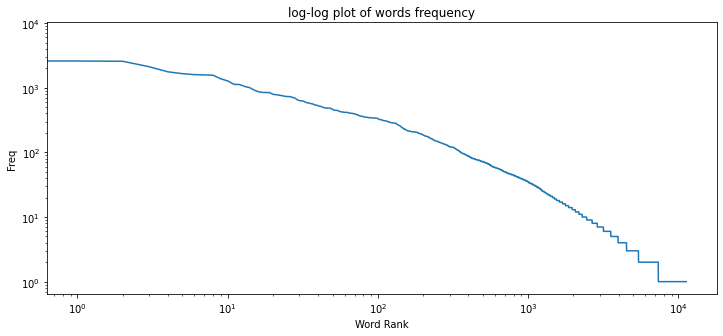

In [ ]:
from collections import Counter
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
#plt.style.use('dark_background')
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

#Barhplot Top 25 positive words

Text(0.5, 1.0, 'Top 25 Positive Words from Proclomation Tweets')

Text(0, 0.5, 'Word')

Text(0.5, 0, 'Number of Occurences')

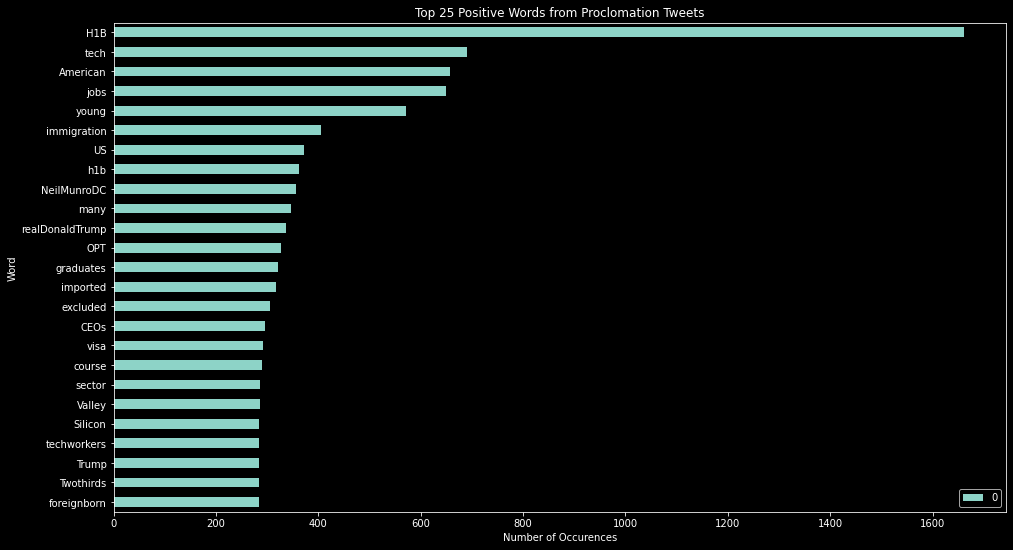

In [ ]:
positives = new_df [new_df.sentiment == 'positive']
positive_list=positives['tweet'].tolist()

# Create a dictionary
word_counts = {}
for line in positive_list:
  # Split the tweets into words
    words = line.split()
    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1 #Get previous entry, update by 1
# Update word counts
# Create Bar Graph


#With Pandas
counts = pd.DataFrame.from_dict(word_counts, orient='index')
counts = counts.sort_values(by=counts.columns[0], ascending=False)
cnt1 = counts.head(25).sort_values(by=counts.columns[0], ascending=True)
cnt1.plot(kind='barh')
plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('dark_background')
plt.title('Top 25 Positive Words from Proclomation Tweets')
plt.ylabel('Word')
plt.xlabel('Number of Occurences')
# Include descriptive titles and labels


In [ ]:
# Display positive words 
cnt2 = counts[0].sort_values(ascending=False)
cnt2 = pd.DataFrame(cnt2)
cnt2.head(25)

0
H1B              1661
tech              690
American          658
jobs              650
young             572
immigration       406
US                372
h1b               362
NeilMunroDC       357
many              347
realDonaldTrump   336
OPT               327
graduates         321
imported          318
excluded          306
CEOs              296
visa              291
course            289
sector            287
Valley            287
Silicon           285
Trump             284
Twothirds         284
techworkers       284
foreignborn       284

# Barh plot Top 25 negative words

Text(0.5, 1.0, 'Top 25 Negative Words from Proclomation Tweets')

Text(0, 0.5, 'Word')

Text(0.5, 0, 'Number of Occurences')

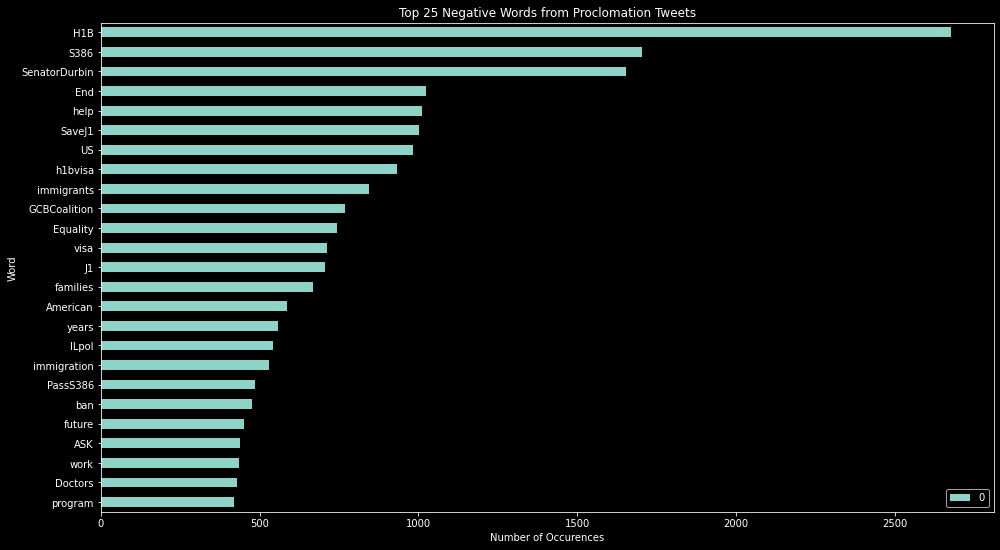

In [ ]:
negatives = new_df [new_df.sentiment == 'negative']
negative_list=negatives['tweet'].tolist()

# Create a dictionary
word_counts = {}
for line in negative_list:
  # Split the tweets into words
    words = line.split()
    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1 #Get previous entry, update by 1
# Update word counts
# Create Bar Graph


#With Pandas
counts = pd.DataFrame.from_dict(word_counts, orient='index')
counts = counts.sort_values(by=counts.columns[0], ascending=False)
cnt1 = counts.head(25).sort_values(by=counts.columns[0], ascending=True)
cnt1.plot(kind='barh')

plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('dark_background')
plt.title('Top 25 Negative Words from Proclomation Tweets')
plt.ylabel('Word')
plt.xlabel('Number of Occurences')
# Include descriptive titles and labels


In [ ]:
# Display negative words 
cnt2 = counts[0].sort_values(ascending=False)
cnt2 = pd.DataFrame(cnt2)
cnt2.head(25)

0
H1B            2678
S386           1705
SenatorDurbin  1653
End            1023
help           1010
SaveJ1         1003
US              982
h1bvisa         934
immigrants      845
GCBCoalition    769
Equality        744
visa            712
J1              706
families        668
American        587
years           559
ILpol           541
immigration     530
PassS386        485
ban             476
future          450
ASK             437
work            434
Doctors         428
program         419

# Barh Plot  Top 25 neutral words

Text(0.5, 1.0, 'Top 25 Neutral Words from Proclomation Tweets')

Text(0, 0.5, 'Word')

Text(0.5, 0, 'Number of Occurences')

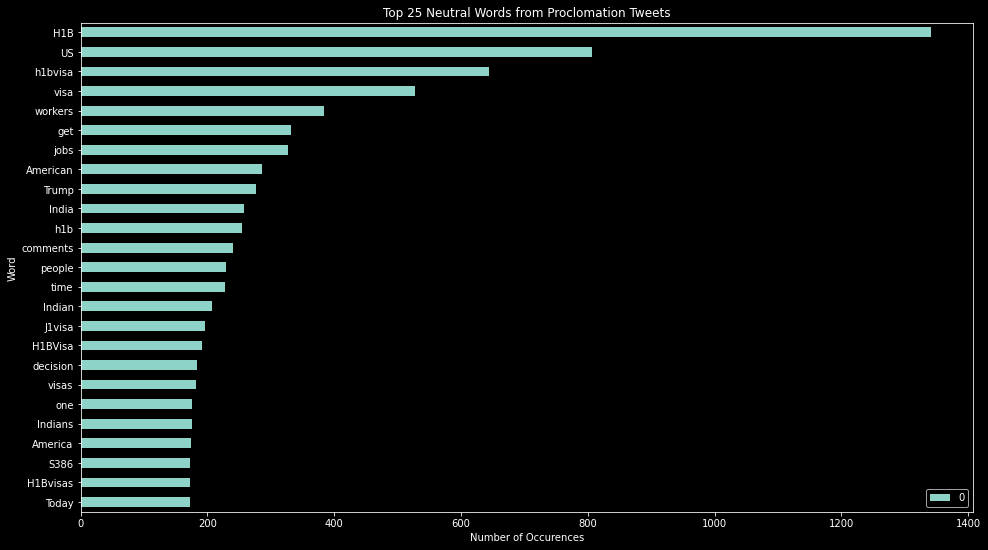

In [ ]:
neutrals = new_df [new_df.sentiment == 'neutral']
neutral_list=neutrals['tweet'].tolist()

# Create a dictionary
word_counts = {}
for line in neutral_list:
  # Split the tweets into words
    words = line.split()
    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1 #Get previous entry, update by 1
# Update word counts
# Create Bar Graph


#With Pandas
counts = pd.DataFrame.from_dict(word_counts, orient='index')
counts = counts.sort_values(by=counts.columns[0], ascending=False)
cnt1 = counts.head(25).sort_values(by=counts.columns[0], ascending=True)
cnt1.plot(kind='barh')

plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('dark_background')
plt.title('Top 25 Neutral Words from Proclomation Tweets')
plt.ylabel('Word')
plt.xlabel('Number of Occurences')
# Include descriptive titles and labels


# Distribution of number of tweets in each Class

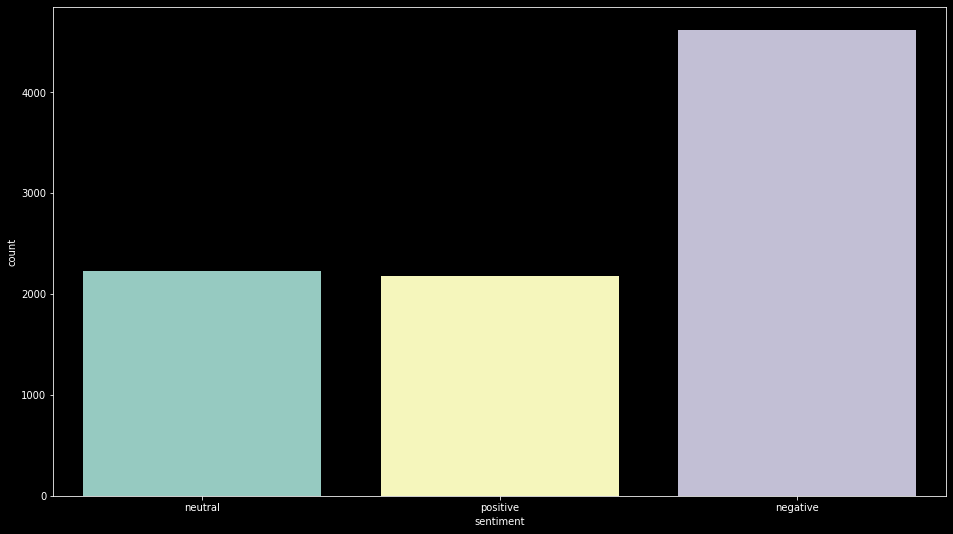

In [ ]:
#How many tweets are present in each class in the labeled Proclomation tweets?
# Quick histogram of tweet classes

sns.countplot(x='sentiment', data=new_df);

# Sentiment pieplot

([<matplotlib.patches.Wedge at 0x7f0e52beb6d8>,
 [Text(-0.7706037725107667, 0.7849648564057977, 'neutrals'),
  Text(0.019925511610251554, -1.0998195188243705, 'negatives'),
  Text(0.7562584783586451, 0.7987947883597307, 'positives')],
 [Text(-0.42032933046041815, 0.42816264894861694, '24.7%'),
  Text(0.010868460878319029, -0.5999015557223838, '51.2%'),
  Text(0.4125046245592609, 0.4357062481962167, '24.1%')])

(-1.1027189858094435,
 1.1062598036283315,
 -1.1023839257394863,
 1.1001135202733088)

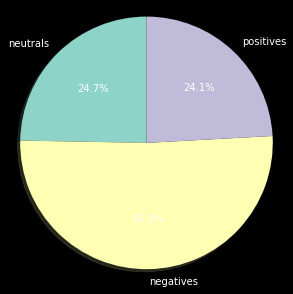

In [ ]:
# Sentiment pieplot
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'neutrals', 'negatives','positives'

# Sizes for each slide
sizes = [len(neutrals), len(negatives),len(positives)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

# PreProcessing Data: 
Data was preprocessed as follows:
* Target columns of sentiments were encoded to 0 for negative sentiment, 1 for neutral sentiment, and 2 for negative sentiment.

* Tweets were tokenized, then vectorized using one of vectorizer such as TFIDF, and embedding techniques. 


# Modeling Data


To search for better accuracy, Modelling Data was done in three parts.
* Part 1: TfidfVectorizer
* Part 2: Embedding with Doc2Vec Vectorizer.
* Part3: Embedding  with Word2Vec Vectorizer in pretrained model glove.
 


# Train/Test/Split

Before modeling, I still need to perform more preprocessing on my data.I will need to encode my target and tokenize my features as following:

### Encoding Labels

In [ ]:
le = LabelEncoder()

le.fit(df['sentiment'])

df['target'] = le.transform(df['sentiment'])
df.head(50)

LabelEncoder()

Tweet Id  ... target
0   1.280000e+18  ...      1
1   1.280000e+18  ...      1
2   1.280000e+18  ...      2
3   1.280000e+18  ...      1
4   1.280000e+18  ...      1
5   1.280000e+18  ...      1
6   1.280000e+18  ...      1
7   1.280000e+18  ...      2
8   1.280000e+18  ...      1
9   1.280000e+18  ...      2
10  1.280000e+18  ...      0
11  1.280000e+18  ...      2
12  1.280000e+18  ...      2
13  1.280000e+18  ...      2
14  1.280000e+18  ...      1
15  1.280000e+18  ...      2
16  1.280000e+18  ...      2
17  1.280000e+18  ...      1
18  1.280000e+18  ...      2
19  1.280000e+18  ...      2
20  1.280000e+18  ...      2
21  1.280000e+18  ...      2
22  1.280000e+18  ...      1
23  1.280000e+18  ...      0
24  1.280000e+18  ...      2
25  1.280000e+18  ...      2
26  1.280000e+18  ...      0
27  1.280000e+18  ...      2
28  1.280000e+18  ...      2
29  1.280000e+18  ...      0
30  1.280000e+18  ...      1
31  1.280000e+18  ...      0
32  1.280000e+18  ...      0
33  1.280000e+18  ...      1
34  1.280000e+18  ...      2
35  1.280000e+18  ...      1
36  1.280000e+18  ...      2
37  1.280000e+18  ...      2
38  1.280000e+18  ...      2
39  1.280000e+18  ...      0
40  1.280000e+18  ...      2
41  1.280000e+18  ...      2
42  1.280000e+18  ...      2
43  1.280000e+18  ...      2
44  1.280000e+18  ...      0
45  1.280000e+18  ...      0
46  1.280000e+18  ...      2
47  1.280000e+18  ...      2
48  1.280000e+18  ...      2
49  1.280000e+18  ...      2

[50 rows x 6 columns]

### Encoder Classes

In [ ]:
# Dictionary to store sentiment values

sentiment_key = {0: le.classes_[0], 1: le.classes_[1], 2: le.classes_[2]}
print(sentiment_key)

{0: 'negative', 1: 'neutral', 2: 'positive'}




Define X and y


In [ ]:
from sklearn.model_selection import train_test_split

X = df['tweet']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size=0.40,
                                                    random_state=123,shuffle=True)

In [ ]:
y_test.value_counts()

0    1843
1     900
2     865
Name: target, dtype: int64

In [ ]:
y_train.value_counts()


0    2764
1    1348
2    1298
Name: target, dtype: int64

# Part 1: TfidfVectorizer:

## Vectorization:
TF-IDF

## Classifiers:

LinearSVC, SGDClassifier,LogisticRegression,Random Forest balanced with smote and gridserch tuned, Multinomial NB, Adaboost, XGBoost, Neural Network

Train-Test Split:
60% Training, 40% Testing
Evaluation:
Confusion Matrix, Classification Report, Accuracy Score
 


#  LinearSVC

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from nltk import TweetTokenizer
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# Initialize the TweetTokenizer

tokenizer = TweetTokenizer(preserve_case=False)

In [ ]:
## Make a list of stopwords to remove
from nltk.corpus import stopwords
import string
# Get all the stop words in the English language
stopwords_list = stopwords.words('english')

additional_words = ['“','”','...','``',"''",'’',"httpst",'amp',"theto","}",
                    "{","rt",".codgy3azxwOY"]
   

In [ ]:
## Add punctuation to stopwords_list
stopwords_list+=string.punctuation
## Add additional_words to stopwords_list
stopwords_list.extend(additional_words)
print(len(stopwords_list))
stopwords_list2 = []
for x in stopwords_list:
  if x not in ['#', '@']:
    stopwords_list2.append(x)
len(stopwords_list2)

224


222

In [ ]:
linear_svc = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list2,
                                                 tokenizer=tokenizer.tokenize)),
                     ('clf', LinearSVC(class_weight='balanced'))])

linear_svc.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3azxwoy', 'codgy'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7f0e52c14ba8>>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight='balanced', dual=True,
         

In [ ]:
# prediction
y_hat_train=linear_svc.predict(X_train)
y_hat_test = linear_svc.predict(X_test)



Classifier: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7f0e52c14ba8>>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight='balanced', dual=Tru

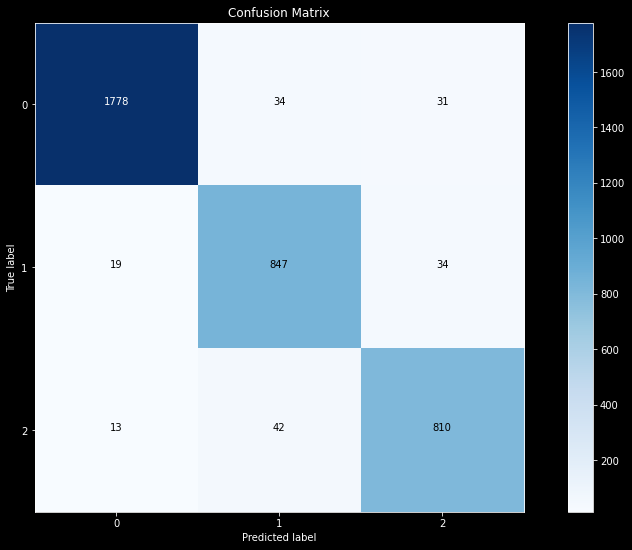

test accuracy: 0.9520509977827051
train accuracy: 0.9964879852125693
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1    2   All
Actual                         
0          1778   34   31  1843
1            19  847   34   900
2            13   42  810   865
All        1810  923  875  3608

test report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1843
           1       0.92      0.94      0.93       900
           2       0.93      0.94      0.93       865

    accuracy                           0.95      3608
   macro avg       0.94      0.95      0.94      3608
weighted avg       0.95      0.95      0.95      3608

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.95

In [ ]:
from sklearn import metrics

results=evaluate_model(linear_svc, y_train, y_test, y_hat_train, y_hat_test)
svm_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
svm_test_acc


In [ ]:
my_results = []
my_res = {
    "model": "LinearSVC",
    "type": "Linear Classifier",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

model               type   Test Accuracy
0  LinearSVC  Linear Classifier        0.952051

# MulitinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
text_mnb = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list2,
                                               tokenizer=tokenizer.tokenize)),
                     ('clf', MultinomialNB())])

# Feed the training data through the pipeline
text_mnb.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3azxwoy', 'codgy'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
               

In [ ]:
#Predictions
y_hat_train=text_mnb.predict(X_train)
y_hat_test = text_mnb.predict(X_test)



# Metrics

Classifier: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
   

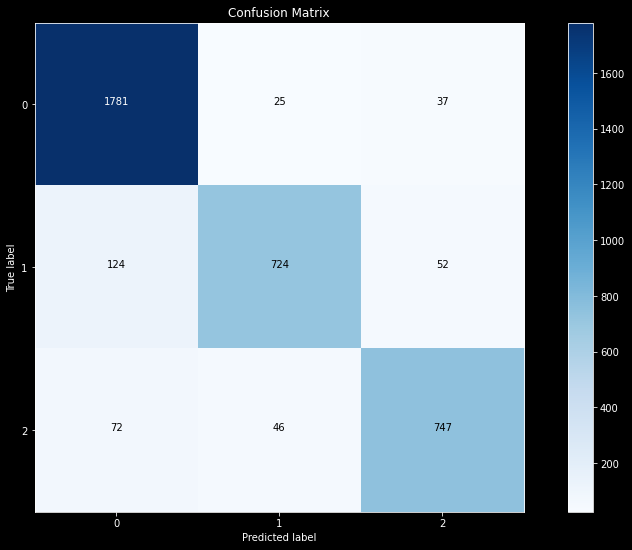

test accuracy: 0.9013303769401331
train accuracy: 0.9574861367837338
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1    2   All
Actual                         
0          1781   25   37  1843
1           124  724   52   900
2            72   46  747   865
All        1977  795  836  3608

test report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1843
           1       0.91      0.80      0.85       900
           2       0.89      0.86      0.88       865

    accuracy                           0.90      3608
   macro avg       0.90      0.88      0.89      3608
weighted avg       0.90      0.90      0.90      3608

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.9

In [ ]:
results=evaluate_model(text_mnb, y_train, y_test, y_hat_train, y_hat_test)
mnb_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
mnb_test_acc

In [ ]:
my_res = {
    "model": "MulitinomialNB",
    "type": "naive Bayes Classifier",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

model                    type   Test Accuracy
0       LinearSVC       Linear Classifier        0.952051
1  MulitinomialNB  naive Bayes Classifier        0.901330

# SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier


In [ ]:
text_sgdc = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list2,
                                                tokenizer=tokenizer.tokenize)),
                     ('clf', SGDClassifier())])


text_sgdc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3azxwoy', 'codgy'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                           

In [ ]:

#Predictions
y_hat_train=text_sgdc.predict(X_train)
y_hat_test = text_sgdc.predict(X_test)



# Metrics

Classifier: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
               

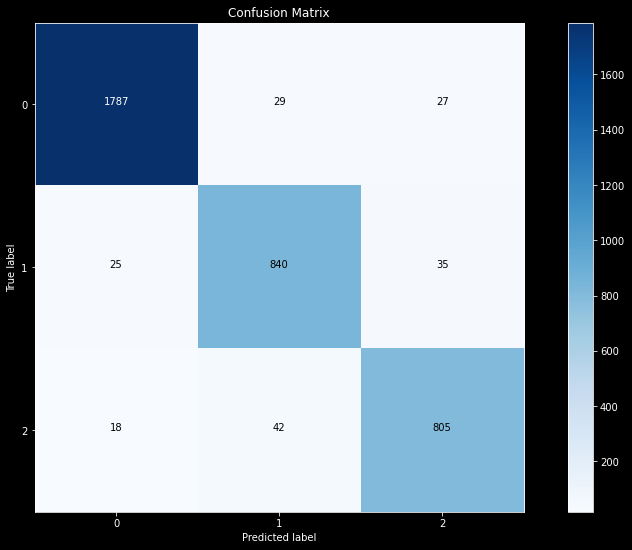

test accuracy: 0.9512195121951219
train accuracy: 0.9953789279112755
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1    2   All
Actual                         
0          1787   29   27  1843
1            25  840   35   900
2            18   42  805   865
All        1830  911  867  3608

test report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1843
           1       0.92      0.93      0.93       900
           2       0.93      0.93      0.93       865

    accuracy                           0.95      3608
   macro avg       0.94      0.94      0.94      3608
weighted avg       0.95      0.95      0.95      3608

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.95

In [ ]:
results=evaluate_model(text_sgdc, y_train, y_test, y_hat_train, y_hat_test)
sgd_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
sgd_test_acc

In [ ]:
# Collecting Results
my_res = {
    "model": "SGD",
    "type": "Stochastic Gradient Descent (SGD)",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

model                               type   Test Accuracy
0       LinearSVC                  Linear Classifier        0.952051
1  MulitinomialNB             naive Bayes Classifier        0.901330
2             SGD  Stochastic Gradient Descent (SGD)        0.951220

 
 
 
# LogisticRegression 


In [ ]:
from sklearn.linear_model import LogisticRegression
text_lr = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list2,
                                              tokenizer=tokenizer.tokenize)),
                     ('clf', LogisticRegression())])

text_lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3azxwoy', 'codgy'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7f0e52c14ba8>>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
     

In [ ]:
#Predictions
y_hat_train=text_lr.predict(X_train)
y_hat_test = text_lr.predict(X_test)



# Metrics

Classifier: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7f0e52c14ba8>>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=

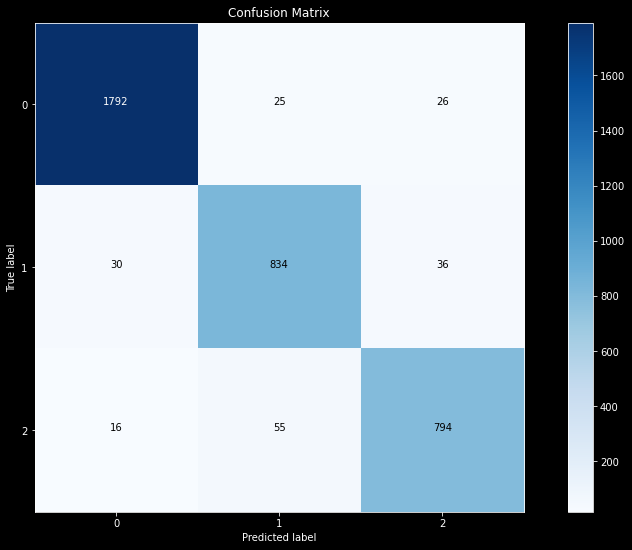

test accuracy: 0.9478935698447893
train accuracy: 0.9874306839186692
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1    2   All
Actual                         
0          1792   25   26  1843
1            30  834   36   900
2            16   55  794   865
All        1838  914  856  3608

test report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1843
           1       0.91      0.93      0.92       900
           2       0.93      0.92      0.92       865

    accuracy                           0.95      3608
   macro avg       0.94      0.94      0.94      3608
weighted avg       0.95      0.95      0.95      3608

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


[0.9478935698447893,
 '              precision    recall  f1-score   support\n\n           0       0.97      0.97      0.97      1843\n           1       0.91      0.93      0.92       900\n           2       0.93      0.92      0.92       865\n\n    accuracy                           0.95      3608\n   macro avg       0.94      0.94      0.94      3608\nweighted avg       0.95      0.95      0.95      3608\n']

In [ ]:
evaluate_model(text_lr, y_train, y_test, y_hat_train, y_hat_test)
lgr_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

In [ ]:
my_res = {
    "model": "LogisticRegression",
    "type": "Classifier",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

model                               type   Test Accuracy
0           LinearSVC                  Linear Classifier        0.952051
1      MulitinomialNB             naive Bayes Classifier        0.901330
2                 SGD  Stochastic Gradient Descent (SGD)        0.951220
3  LogisticRegression                         Classifier        0.951220

#  RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
text_rfc = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list2,
                                               tokenizer=tokenizer.tokenize)),
                     ('clf', RandomForestClassifier(class_weight='balanced'))])

text_rfc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3azxwoy', 'codgy'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_lea

In [ ]:
#Predictions
y_hat_train=text_rfc.predict(X_train)
y_hat_test = text_rfc.predict(X_test)



# Metrics

Classifier: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                   

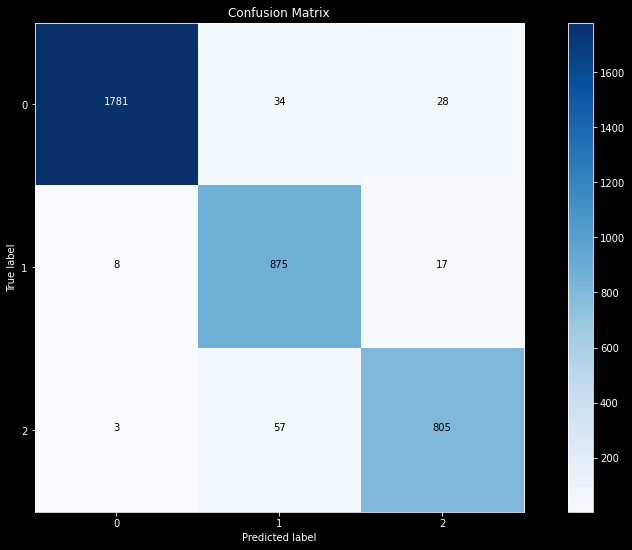

test accuracy: 0.9592572062084257
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1    2   All
Actual                         
0          1781   34   28  1843
1             8  875   17   900
2             3   57  805   865
All        1792  966  850  3608

test report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1843
           1       0.91      0.97      0.94       900
           2       0.95      0.93      0.94       865

    accuracy                           0.96      3608
   macro avg       0.95      0.96      0.95      3608
weighted avg       0.96      0.96      0.96      3608

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.96

In [ ]:
results=evaluate_model(text_rfc, y_train, y_test, y_hat_train, y_hat_test)
rf_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
rf_test_acc

In [ ]:
my_res = {
    "model": "RandomForestClassifier",
    "type": "Class=WeightBalance",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

model                               type   Test Accuracy
0               LinearSVC                  Linear Classifier        0.952051
1          MulitinomialNB             naive Bayes Classifier        0.901330
2                     SGD  Stochastic Gradient Descent (SGD)        0.951220
3      LogisticRegression                         Classifier        0.951220
4  RandomForestClassifier                Class=WeightBalance        0.959257

All my models showed great accuracy, however there is a kind of discrepancy between train and test, this discrepancy shows kind of little overfitting and can be solved by adjusting the weight balance in all classes and hypertuning the parameters. I will play first with the weight balance. Later, I will work in optimizing the parameters.
Since Random Forest showed the best result,I will further work in balancing the classes with smote techniques.



# Balancing with Smote

In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import  SMOTE
from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer(lowercase=True, stop_words=stopwords_list2,
                            tokenizer=tokenizer.tokenize)

rfc = RandomForestClassifier(class_weight='balanced')

# RFC - SMOTE

In [ ]:
SMOTE_pipeline = make_pipeline(tfidf, SMOTE(random_state=123),rfc)
SMOTE_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3azxwoy', 'codgy'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourse...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf

In [ ]:
#Predictions
y_hat_train=SMOTE_pipeline.predict(X_train)
y_hat_test = SMOTE_pipeline.predict(X_test)



# Metrics

Classifier: Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourse...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                    

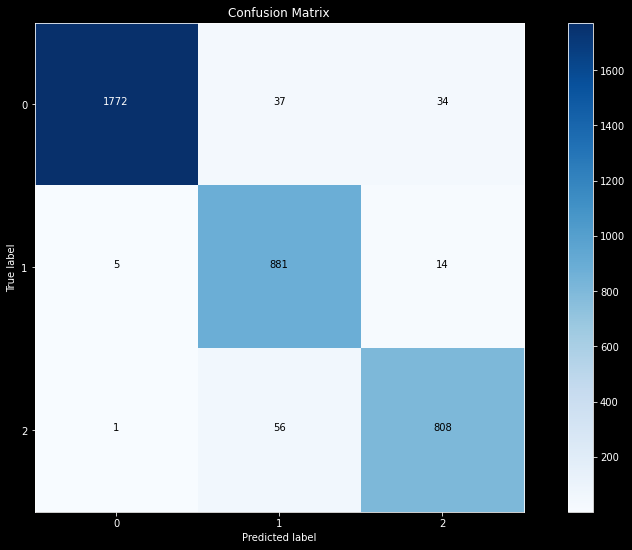

test accuracy: 0.9592572062084257
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1    2   All
Actual                         
0          1772   37   34  1843
1             5  881   14   900
2             1   56  808   865
All        1778  974  856  3608

test report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1843
           1       0.90      0.98      0.94       900
           2       0.94      0.93      0.94       865

    accuracy                           0.96      3608
   macro avg       0.95      0.96      0.95      3608
weighted avg       0.96      0.96      0.96      3608

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.96

In [ ]:
results=evaluate_model(SMOTE_pipeline, y_train, y_test, y_hat_train, y_hat_test)
smote_rf_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
smote_rf_test_acc 

In [ ]:
my_res = {
    "model": "RFC - SMOTE ",
    "type": "Randomforest Balanced by Smote",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

model                               type   Test Accuracy
0               LinearSVC                  Linear Classifier        0.952051
1          MulitinomialNB             naive Bayes Classifier        0.901330
2                     SGD  Stochastic Gradient Descent (SGD)        0.951220
3      LogisticRegression                         Classifier        0.951220
4  RandomForestClassifier                Class=WeightBalance        0.959257
5            RFC - SMOTE      Randomforest Balanced by Smote        0.959257

### Smote Didn't add any improvement. Now, I will try hypertuning randomforest parameters and I will keep working with smote on my train dataset

# Hyper Tunning

With tring smote there is a neglible improvment not worth it to consider.Now I will try to hypertune the parameters and look for the best parameter and best estimator, so I can plug it again in my model and check if the metrics will improve.

In [ ]:
params = {'randomforestclassifier__criterion':['gini','entropy'],
             'randomforestclassifier__max_depth':[None, 5, 3, 10],
             'randomforestclassifier__min_samples_leaf': [1,2,3],
         'randomforestclassifier__max_features':['auto','sqrt',3,5,10,30,70]}

In [ ]:
SMOTE_pipeline = make_pipeline(tfidf, SMOTE(random_state=123),rfc)


In [ ]:
grid = GridSearchCV(SMOTE_pipeline, cv=5, n_jobs=-1, param_grid=params ,
                    scoring='recall_macro')

In [ ]:
grid.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3azxwoy', 'codgy'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidfvectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                               

In [ ]:
grid.score(X_test, y_test)


0.9570751242964493


### Research best estimator from grid

In [ ]:
grid.best_params_


{'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__min_samples_leaf': 1}

In [ ]:
# Research best estimator from grid
best_pipe = grid.best_estimator_


In [ ]:
best_pipe

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourse...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf

In [ ]:
best_pipe.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourse...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf

In [ ]:


#Predictions
y_hat_train=best_pipe.predict(X_train)
y_hat_test = best_pipe.predict(X_test)




Classifier: Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourse...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                    

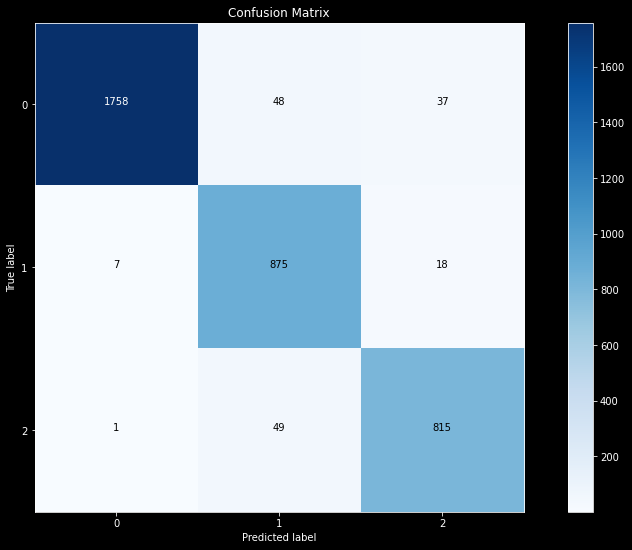

test accuracy: 0.9556541019955654
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1    2   All
Actual                         
0          1758   48   37  1843
1             7  875   18   900
2             1   49  815   865
All        1766  972  870  3608

test report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1843
           1       0.90      0.97      0.93       900
           2       0.94      0.94      0.94       865

    accuracy                           0.96      3608
   macro avg       0.94      0.96      0.95      3608
weighted avg       0.96      0.96      0.96      3608

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.96

In [ ]:
results=evaluate_model(best_pipe, y_train, y_test, y_hat_train, y_hat_test)
rf_gridsearch_test_acc = round(accuracy_score(y_test,y_hat_test), 2)
rf_gridsearch_test_acc


In [ ]:
my_res = {
    "model": "RFC -GridSearch ",
    "type": "Randomforest Hypertuned by best estimator",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

model  ...  Test Accuracy
0               LinearSVC  ...       0.952051
1          MulitinomialNB  ...       0.901330
2                     SGD  ...       0.951220
3      LogisticRegression  ...       0.951220
4  RandomForestClassifier  ...       0.959257
5            RFC - SMOTE   ...       0.959257
6        RFC -GridSearch   ...       0.955654

[7 rows x 3 columns]

### Hypertunning also didn't add any improvement. So I will check now feature extraction of random forest classifier and I will try other models that are well-known for their good accuracy results such as AdaBoost,XGBoost and neural network.

# Extract Feature Importances

<Figure size 720x864 with 0 Axes>

Text(0.5, 1.0, 'Feature importance of Random Forest model')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 136 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 139 missing from current font.
  font.set_text(s, 0.0,

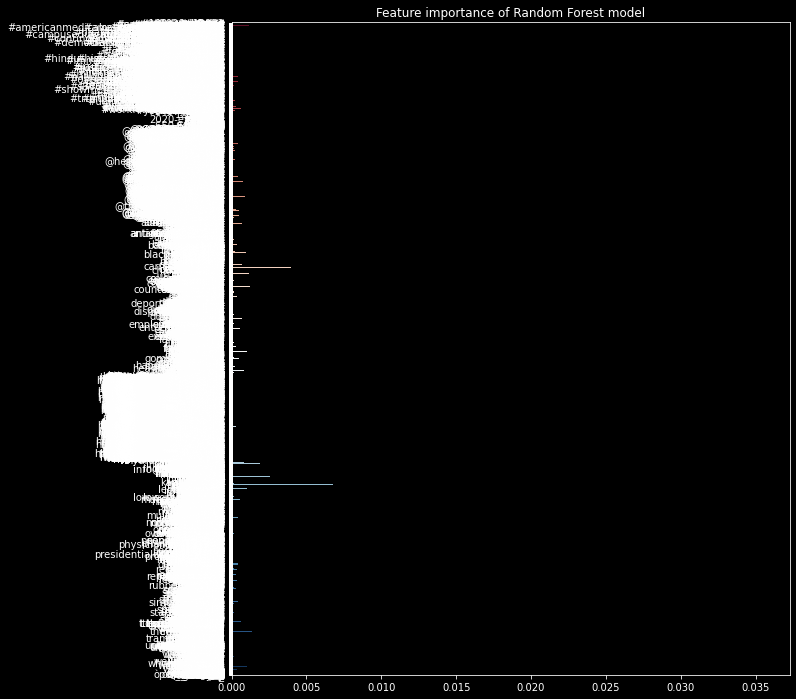

In [ ]:
treedf = pd.Series(data=best_pipe.named_steps['randomforestclassifier'].feature_importances_,
                      index=best_pipe.named_steps['tfidfvectorizer'].get_feature_names())

plt.figure(figsize=(10,12))
plt.title("Feature importance of Random Forest model")
ax = sns.barplot(y=treedf.index, x=treedf.values, palette="RdBu")


In [ ]:
top_words = treedf.sort_values(ascending=False).head(10).index
    
 #     '''
#     "For loop" cycling through top 10 feature importances words and placing them in a 
#     dictionary with the "word" as the the key and "value counts" as the value per class.
    
#     Returns DataFrame with "word" as index and normalized value counts for each class
#     where the "word" is present.
#  the "word" is present.
 #   '''

word_dict={}
for word in top_words:
    
    word_df=new_df.copy()

    word_df["contains"] = word_df["tweet"].str.contains(word)

    sentiment = ["negative", "neutral", "positive"]

    emo_dict = {}
    for emo in sentiment:
        emo_df = word_df.groupby("sentiment").get_group(emo)
        emo_df["contains"].value_counts(normalize=True)
        emo_dict[emo] = emo_df["contains"].value_counts(normalize=True)

    word_dict[word]= pd.Series(emo_dict, name=word)


False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    0.883832
True     0.116168
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    0.817096
True     0.182904
Name: contains, dtype: float64

False    0.771131
True     0.228869
Name: contains, dtype: float64

False    0.925943
True     0.074057
Name: contains, dtype: float64

False    0.967831
True     0.032169
Name: contains, dtype: float64

False    0.971175
True     0.028825
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    0.985046
True     0.014954
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    0.744026
True     0.255974
Name: contains, dtype: float64

False    0.965106
True     0.034894
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    0.888787
True     0.111213
Name: contains, dtype: float64

In [ ]:
pd.DataFrame(word_dict).T


negative  ...                                           positive
#savej1               False    1.0
Name: contains, dtype: float64  ...        False    1.0
Name: contains, dtype: float64
#h1bvisa              False    1.0
Name: contains, dtype: float64  ...        False    1.0
Name: contains, dtype: float64
@senatordurbin        False    1.0
Name: contains, dtype: float64  ...        False    1.0
Name: contains, dtype: float64
#h1b                  False    1.0
Name: contains, dtype: float64  ...        False    1.0
Name: contains, dtype: float64
immigration     False    0.883832
True     0.116168
Name: cont...  ...  False    0.817096
True     0.182904
Name: cont...
help            False    0.771131
True     0.228869
Name: cont...  ...  False    0.967831
True     0.032169
Name: cont...
please          False    0.971175
True     0.028825
Name: cont...  ...        False    1.0
Name: contains, dtype: float64
#immigration          False    1.0
Name: contains, dtype: float64  ...        False    1.0
Name: contains, dtype: float64
foreign         False    0.985046
True     0.014954
Name: cont...  ...  False    0.744026
True     0.255974
Name: cont...
cheap           False    0.965106
True     0.034894
Name: cont...  ...  False    0.888787
True     0.111213
Name: cont...

[10 rows x 3 columns]

#AdaBoost Classifier

In [ ]:
# Instantiate classifier, fit, and predict on test data
from sklearn.ensemble import  AdaBoostClassifier


text_adc=Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list2,
                                               tokenizer=tokenizer.tokenize)),
                     ('clf', AdaBoostClassifier())])

text_adc.fit(X_train, y_train)




/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3azxwoy', 'codgy'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                             'it', "it's", 'its', 'itself', ...],
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.token

In [ ]:
#Predictions
y_hat_train=text_adc.predict(X_train)
y_hat_test = text_adc.predict(X_test)


Classifier: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                             'it', "it's", 'its', 'itself', ...],
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<bound method TweetTokenizer.tokenize of

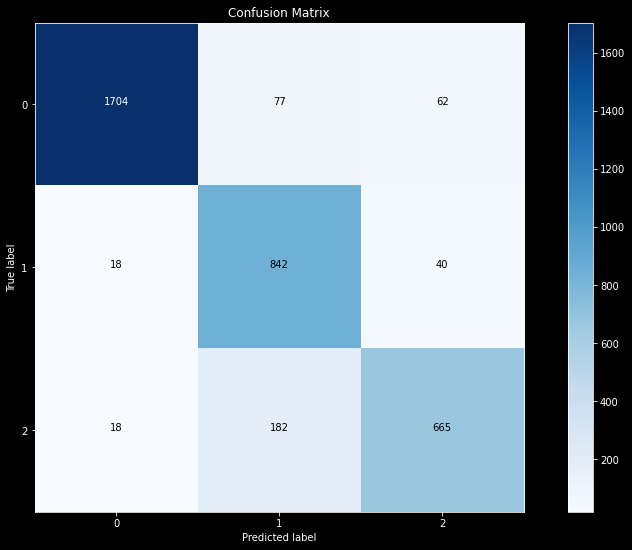

test accuracy: 0.8899667405764967
train accuracy: 0.8970425138632163
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0     1    2   All
Actual                          
0          1704    77   62  1843
1            18   842   40   900
2            18   182  665   865
All        1740  1101  767  3608

test report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1843
           1       0.76      0.94      0.84       900
           2       0.87      0.77      0.81       865

    accuracy                           0.89      3608
   macro avg       0.87      0.88      0.87      3608
weighted avg       0.90      0.89      0.89      3608

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.89

In [ ]:
# Evaluate classifier
results=evaluate_model(text_adc, y_train, y_test, y_hat_train, y_hat_test)

ada_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
ada_test_acc

# Summarizing Results

In [ ]:
my_res = {
    "model": "text_adc ",
    "type": "AdaBoost classifie ",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

model  ...  Test Accuracy
0               LinearSVC  ...       0.952051
1          MulitinomialNB  ...       0.901330
2                     SGD  ...       0.951220
3      LogisticRegression  ...       0.951220
4  RandomForestClassifier  ...       0.959257
5            RFC - SMOTE   ...       0.959257
6        RFC -GridSearch   ...       0.955654
7               text_adc   ...       0.889967

[8 rows x 3 columns]

# XGBoost Classifier

In [ ]:
# Instantiate classifier, fit, and predict on test data


text_xgb = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list2,
                                              tokenizer=tokenizer.tokenize)),
                     ('clf', XGBClassifier())])

text_xgb.fit(X_train, y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3azxwoy', 'codgy'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child

In [ ]:
#Predictions
y_hat_train=text_xgb.predict(X_train)
y_hat_test = text_xgb.predict(X_test)


Classifier: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                            

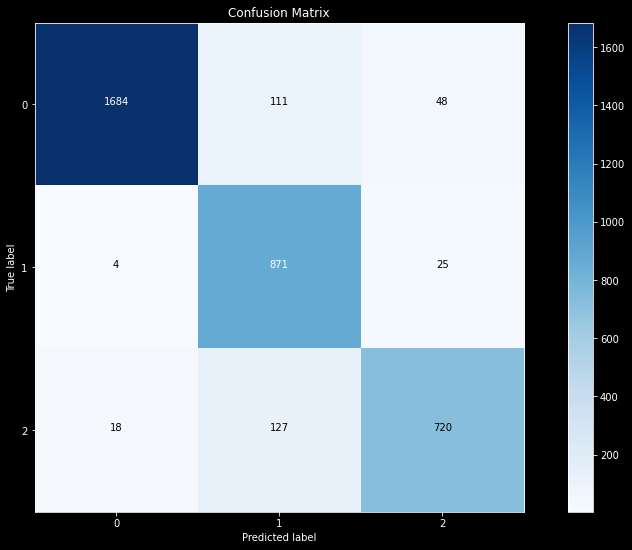

test accuracy: 0.9077050997782705
train accuracy: 0.933271719038817
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0     1    2   All
Actual                          
0          1684   111   48  1843
1             4   871   25   900
2            18   127  720   865
All        1706  1109  793  3608

test report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1843
           1       0.79      0.97      0.87       900
           2       0.91      0.83      0.87       865

    accuracy                           0.91      3608
   macro avg       0.89      0.90      0.89      3608
weighted avg       0.92      0.91      0.91      3608

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.91

In [ ]:
results=evaluate_model(text_xgb, y_train, y_test, y_hat_train, y_hat_test)
xgb_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
xgb_test_acc

In [ ]:
my_res = {
    "model": "text_xgb ",
    "type": "XGBoost Classifier ",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

model  ...  Test Accuracy
0               LinearSVC  ...       0.952051
1          MulitinomialNB  ...       0.901330
2                     SGD  ...       0.951220
3      LogisticRegression  ...       0.951220
4  RandomForestClassifier  ...       0.959257
5            RFC - SMOTE   ...       0.959257
6        RFC -GridSearch   ...       0.955654
7               text_adc   ...       0.889967
8               text_xgb   ...       0.907705

[9 rows x 3 columns]

#Neural Network Classifier

In [ ]:
# Define simple neural network model

vectorizer = TfidfVectorizer(max_features=100)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

model = Sequential()
model.add(Dense(100, input_dim=100, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile model

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

# Fit to training data
model.fit(X_train, y_train, epochs=5, batch_size=100, 
          validation_data=(X_test, y_test))

Train on 5410 samples, validate on 3608 samples
Epoch 1/5
5410/5410 [==============================] - 2s 349us/step - loss: 0.9853 - accuracy: 0.5201 - val_loss: 0.8621 - val_accuracy: 0.5801
Epoch 2/5
5410/5410 [==============================] - 0s 35us/step - loss: 0.7610 - accuracy: 0.6662 - val_loss: 0.6713 - val_accuracy: 0.7273
Epoch 3/5
5410/5410 [==============================] - 0s 33us/step - loss: 0.6065 - accuracy: 0.7455 - val_loss: 0.5683 - val_accuracy: 0.7594
Epoch 4/5
5410/5410 [==============================] - 0s 34us/step - loss: 0.5244 - accuracy: 0.7784 - val_loss: 0.5125 - val_accuracy: 0.7855
Epoch 5/5
5410/5410 [==============================] - 0s 34us/step - loss: 0.4743 - accuracy: 0.8094 - val_loss: 0.4769 - val_accuracy: 0.8052


In [ ]:
#Predictions
y_hat_train=model.predict(X_train)
y_hat_test = model.predict(X_test)


# Define metrics function


In [ ]:
def evaluate_clf(y_true, y_pred):
    """Return confusion matrix, classification report, and accuracy score
    for a classifier.
    
    Parameters
    ----------
    y_true : array-like
        Target class labels
    y_pred : array-like
        Predicted class labels
        
    Returns
    ----------
    Confusion matrix, classification report, accuracy score
    """
    
    test_acc = round(accuracy_score(y_true, y_pred), 2)
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('---'*20)
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('---'*20)
    print('Test Accuracy:')
    print(test_acc)
    

In [ ]:
# Make predictions on test data

nn_test_pred = model.predict_classes(X_test)

# Evaluate classifier performance

evaluate_clf(y_test, nn_test_pred)
nn_test_acc = round(accuracy_score(y_test, nn_test_pred), 2)

Confusion Matrix:
[[1608  107  128]
 [ 139  673   88]
 [ 120  121  624]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1843
           1       0.75      0.75      0.75       900
           2       0.74      0.72      0.73       865

    accuracy                           0.81      3608
   macro avg       0.78      0.78      0.78      3608
weighted avg       0.80      0.81      0.80      3608

------------------------------------------------------------
Test Accuracy:
0.81


In [ ]:
# summarize the results
my_res = {
    "model": "model ",
    "type": "neural network ",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

model  ...  Test Accuracy
0               LinearSVC  ...       0.952051
1          MulitinomialNB  ...       0.901330
2                     SGD  ...       0.951220
3      LogisticRegression  ...       0.951220
4  RandomForestClassifier  ...       0.959257
5            RFC - SMOTE   ...       0.959257
6        RFC -GridSearch   ...       0.955654
7               text_adc   ...       0.889967
8               text_xgb   ...       0.907705
9                  model   ...       0.907705

[10 rows x 3 columns]

Now, I will try diffirent nlp techniques that are related to vectorizer called embedding and I will compare the results to my models of tfdif vectorizer. I'm going to focus on the following Algorthim through the rest of my project.

# Part One Summary of Models:(Based on TFIDF Vectorizer)

In [ ]:
# Create classifier summary table

models = ['Linear SVC', 'Random Forest', 'Multinomial Naive Bayes', 
                  'AdaBoost', 'XGBoost', 'Neural Network']

tfidf_model_accs = [svm_test_acc, rf_test_acc, mnb_test_acc, ada_test_acc,
                    xgb_test_acc, nn_test_acc]

tfidf_summary = pd.DataFrame([models, tfidf_model_accs]).T

tfidf_summary.columns = ['Classifier', 'Tfidf Accuracy']

tfidf_summary

Classifier Tfidf Accuracy
0               Linear SVC           0.95
1            Random Forest           0.96
2  Multinomial Naive Bayes            0.9
3                 AdaBoost           0.89
4                  XGBoost           0.91
5           Neural Network           0.81

### Using TF-IDF as a vectorizer, RandomForestClassifier performed as the best classifier with 96% accuracy, closely followed by LinearSVC,SGD,and LogisticRegression with (95%), Advanced Algorithms such as AdaBoost,XGBoost, and Neural Network got the lowest accuracy. Also, Hyper tune and trying the best estimator on my best model i.e. RandomForest didn't improve the model at all. Aditionally, trying to balnce the classes using Smote Balance Technique didn't improve the accuracy. 




Next, I'm going to try more modeling but this time with using Doc2Vec Vectorizer

# Part 2: Modeling based on Doc2Vec Vectorizer

## Vectorization:
### Doc2Vec

### Classifiers:
LinearSVC, Random Forest, Multinomial NB, Adaboost, XGBoost, Neural Network

Train-Test Split:
60% Training,40% Testing
### Evaluation:
Confusion Matrix, Classification Report, Accuracy Score




### Tokenize Tweets

# Generating Word Embeddings

#### Fit Doc2Vec Model on labeled data

In [ ]:

# Tokenize kaggle_df text
import nltk
nltk.download('punkt')
new_df['tokens'] =new_df['tweet'].map(lambda x: word_tokenize(x))    

#for token in new_df['tokens']:
    #print(token)
new_df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

tweet  ...                                             tokens
0  behindwoods TCS Infosys TechMahindra come solu...  ...  [behindwoods, TCS, Infosys, TechMahindra, come...
1  TCS Infosys TechMahindra come solutions tackle...  ...  [TCS, Infosys, TechMahindra, come, solutions, ...
2  MarkSKrikorian realDonaldTrump first president...  ...  [MarkSKrikorian, realDonaldTrump, first, presi...
3  UpskillC Skills trump college degree President...  ...  [UpskillC, Skills, trump, college, degree, Pre...
4  Skills trump college degree President Donald T...  ...  [Skills, trump, college, degree, President, Do...

[5 rows x 6 columns]

In [ ]:
# Encoding the label sentiment on the new dataframe to use it for word2vec vectorizer
le = LabelEncoder()

le.fit(new_df['sentiment'])

new_df['target'] = le.transform(new_df['sentiment'])
df.head()

LabelEncoder()

Tweet Id  ... target
0  1.280000e+18  ...      1
1  1.280000e+18  ...      1
2  1.280000e+18  ...      2
3  1.280000e+18  ...      1
4  1.280000e+18  ...      1

[5 rows x 6 columns]

In [ ]:
# Dictionary to store sentiment values

sentiment_key = {0: le.classes_[0], 1: le.classes_[1], 2: le.classes_[2]}
print(sentiment_key)

{0: 'negative', 1: 'neutral', 2: 'positive'}


### Fit Doc2Vec Model on labeled data

In [ ]:
# Create list of tokenized tweets,

tweet_tokens = list(new_df['tokens'])


In [ ]:
# Need to tag data for doc2vec model

tagged_data = [
    TaggedDocument(
        words=tweet, tags=[str(i)])for i, tweet in enumerate(tweet_tokens)
]

In [ ]:
# Instantiate Doc2Vec model and build model vocabulary from tweet data

model = Doc2Vec(vector_size=100, dm=1, epochs=100)

model.build_vocab(tagged_data)

In [ ]:
# Train the model on labeled tweets

model.train(tagged_data, total_examples=model.corpus_count,
            epochs=model.epochs)

In [ ]:
# Now, must use trained model to infer vectors for all tweets

tweet_vecs = []
for tweet in new_df.tokens:
    vec = model.infer_vector(tweet)
    tweet_vecs.append(vec)

tweet_vecs = np.array(tweet_vecs)

In [ ]:
# Define X and y for the d2v models

y = new_df.target
X = tweet_vecs

In [ ]:
# Perform train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,
                                                    random_state=42,shuffle=True)

# LinearSVC Classifier - Doc2Vec Vectorizer

In [ ]:
# Instantiate classifier, fit, and predict on test data

svm_d2v = LinearSVC()
svm_d2v.fit(X_train, y_train)
y_hat_test = svm_d2v.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
# Evaluate classifier performance

results=evaluate_clf(y_test, y_hat_test)
svm_d2v_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

Confusion Matrix:
[[1694  104   77]
 [ 566  223   82]
 [ 589  102  171]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.90      0.72      1875
           1       0.52      0.26      0.34       871
           2       0.52      0.20      0.29       862

    accuracy                           0.58      3608
   macro avg       0.54      0.45      0.45      3608
weighted avg       0.56      0.58      0.52      3608

------------------------------------------------------------
Test Accuracy:
0.58


### SVC model with Doc2VEC Vectorizer gave me very low accuracy with a Recall of 90% for negative tweets, and 27% for neutral and 18% for positive tweets. The weighted avg recall is 57%. I think I got this low accuracy becuase my data is imbalanced. Therefore, I will use smote technique to balance all the classes of negative, positive and neutral.

# Resampling Data by Smote Technique

In [ ]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_sample(X, y) #adding more users/non-users
print(pd.Series(y_resampled).value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


2    4614
1    4614
0    4614
dtype: int64


#### Great all the classes now are balenced. So, I will apply the SVM model again with DOC2VeC Vectorizer on Balanced Data.

### **Smote_d2v_SVM**

In [ ]:
# Instantiate classifier, fit, and predict on test data

svm_d2v_smote = LinearSVC()
svm_d2v_smote.fit(X_train, y_train)
y_hat_test = svm_d2v_smote.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
# Evaluate classifier performance

results=evaluate_clf(y_test, y_hat_test)
svm_sd2v_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

Confusion Matrix:
[[716 188 225]
 [323 593 259]
 [315 263 579]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.63      0.58      1129
           1       0.57      0.50      0.53      1175
           2       0.54      0.50      0.52      1157

    accuracy                           0.55      3461
   macro avg       0.55      0.55      0.54      3461
weighted avg       0.55      0.55      0.54      3461

------------------------------------------------------------
Test Accuracy:
0.55


### After applying Smote technique,SVC model with Doc2VEC Vectorizer gave me again low test accuracy of 57%, with a Recall of 61% for negative tweets, and 53% for neutral and 58% for positive tweets. The weighted avg recall is 57%. Even though the smote balanced my classes, however I'm still getting low accuracy. So now, I will try modeling with Random Forest on smote data vecorized by Doc2Vec.



###Smote Random Forest Model - Doc2VEC Vectorizer

In [ ]:
# Instantiate classifier, fit, and predict on test data

rf_d2v_smote = RandomForestClassifier(random_state=1)
rf_d2v_smote.fit(X_train, y_train)
y_hat_test = rf_d2v_smote.predict(X_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# Evaluate classifier performance

results=evaluate_clf(y_test, y_hat_test)
rf_sd2v_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

Confusion Matrix:
[[1029   67   33]
 [  39 1116   20]
 [  45   48 1064]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1129
           1       0.91      0.95      0.93      1175
           2       0.95      0.92      0.94      1157

    accuracy                           0.93      3461
   macro avg       0.93      0.93      0.93      3461
weighted avg       0.93      0.93      0.93      3461

------------------------------------------------------------
Test Accuracy:
0.93


Randomforest Classifier showed a good test accuracy of 92% with Doc2Vec vectorizer on smote balnced data , with a Recall of 91% for negative tweets, and 94% for neutral and 92% for positive tweets. The weighted avg recall is 92%. So now, I will try to improve my random forest results through a grid search

# Smote_RandomForest_GridSearch_DOC2VEC

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
     'criterion':['gini','entropy'],
    'max_depth':[2,3,4,5,20],
    'min_samples_split':[5,20,50],
    'min_samples_leaf':[15,20,30],
    'n_estimators': [1,5,10]
}
gs = GridSearchCV(rf_d2v_smote, param_grid, cv=3, n_jobs=-1)
gs.fit(X_train, y_train)
gs.best_params_

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 15,
 'min_samples_split': 5,
 'n_estimators': 10}

### The Gridsearh suggests {'criterion': 'entropy','max_depth': 20,'min_samples_leaf': 15 'min_samples_split': 5,'n_estimators': 10} as best parameters. So I will plug them into Randomforest and check the metrics

In [ ]:
# Instantiate and fit a RandomForestClassifier with best parameters
rf_d2v_smote_tuned = RandomForestClassifier(n_estimators=10,
                                criterion= 'entropy',
                                max_depth= 20,
                                min_samples_leaf= 15,
                                min_samples_split= 5)

rf_d2v_smote_tuned.fit(X_train, y_train)

#predictions
y_hat_test = rf_d2v_smote_tuned.predict(X_test)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Evaluate classifier performance

results=evaluate_clf(y_test, y_hat_test)
rf_d2v_tuned_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

Confusion Matrix:
[[829 164 136]
 [105 977  93]
 [113 134 910]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1129
           1       0.77      0.83      0.80      1175
           2       0.80      0.79      0.79      1157

    accuracy                           0.78      3461
   macro avg       0.79      0.78      0.78      3461
weighted avg       0.79      0.78      0.78      3461

------------------------------------------------------------
Test Accuracy:
0.78


Hypertuned Randomforest Classifier with best params has done worse accompanied by Doc2vec, and smote where test accuracy showed 79%, Recall of 75% for negative tweets, and 82% for neutral and 72% for positive tweets. The weighted avg recall is 79%.



## Multinomial Naive Bayes Classifier - Supervised d2v


In [ ]:
# Need to MinMax Scale X data for MNB Classifier

scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
# Instantiate classifier, fit, and predict on test data 

mnb_sd2v_clf = MultinomialNB()
mnb_sd2v_clf.fit(X_train_sc, y_train)
y_hat_test = mnb_sd2v_clf.predict(X_test_sc)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# Evaluate classifier performance

evaluate_clf(y_test, y_hat_test)
mnb_sd2v_test_acc = round(accuracy_score(y_test,y_hat_test), 2)

Confusion Matrix:
[[892 201  36]
 [705 410  60]
 [777 258 122]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.79      0.51      1129
           1       0.47      0.35      0.40      1175
           2       0.56      0.11      0.18      1157

    accuracy                           0.41      3461
   macro avg       0.47      0.41      0.36      3461
weighted avg       0.47      0.41      0.36      3461

------------------------------------------------------------
Test Accuracy:
0.41


## AdaBoost Classifier -d2v

In [ ]:
# Instantiate classifier, fit, predict on test data

ada_sd2v_clf = AdaBoostClassifier(random_state=1)
ada_sd2v_clf.fit(X_train, y_train)
y_hat_test = ada_sd2v_clf.predict(X_test)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [ ]:
# Evaluate classifier performance

evaluate_clf(y_test, y_hat_test)
ada_sd2v_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

Confusion Matrix:
[[678 222 229]
 [269 647 259]
 [323 254 580]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.60      0.57      1129
           1       0.58      0.55      0.56      1175
           2       0.54      0.50      0.52      1157

    accuracy                           0.55      3461
   macro avg       0.55      0.55      0.55      3461
weighted avg       0.55      0.55      0.55      3461

------------------------------------------------------------
Test Accuracy:
0.55


## XGBoost Classifier - Supervised d2v

In [ ]:
# Instantiate classifier, fit, and predict on test data

xgb_sd2v_clf = XGBClassifier(random_state=1)
xgb_sd2v_clf.fit(X_train, y_train)
y_hat_test = xgb_sd2v_clf.predict(X_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Evaluate classifier performance

evaluate_clf(y_test, y_hat_test)
xgb_sd2v_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

Confusion Matrix:
[[812 162 155]
 [142 930 103]
 [149 193 815]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1129
           1       0.72      0.79      0.76      1175
           2       0.76      0.70      0.73      1157

    accuracy                           0.74      3461
   macro avg       0.74      0.74      0.74      3461
weighted avg       0.74      0.74      0.74      3461

------------------------------------------------------------
Test Accuracy:
0.74


Neural Net work-Doc2vec

In [ ]:
# Define the keras model

# Define the keras model

nn_d2v_smote = Sequential()
nn_d2v_smote.add(Dense(100, input_dim=100, activation='relu'))
nn_d2v_smote.add(Dense(3, activation='softmax'))

# compile the keras model

nn_d2v_smote.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
                    metrics=['accuracy'])

# fit the keras model on the dataset

nn_d2v_smote.fit(X_train, y_train, epochs=5, batch_size=100, 
                validation_data=(X_test, y_test))

Train on 10381 samples, validate on 3461 samples
Epoch 1/5
10381/10381 [==============================] - 0s 33us/step - loss: 1.0554 - accuracy: 0.4379 - val_loss: 1.0185 - val_accuracy: 0.4851
Epoch 2/5
10381/10381 [==============================] - 0s 27us/step - loss: 0.9882 - accuracy: 0.5158 - val_loss: 0.9786 - val_accuracy: 0.4958
Epoch 3/5
10381/10381 [==============================] - 0s 25us/step - loss: 0.9434 - accuracy: 0.5512 - val_loss: 0.9408 - val_accuracy: 0.5779
Epoch 4/5
10381/10381 [==============================] - 0s 25us/step - loss: 0.9060 - accuracy: 0.5809 - val_loss: 0.9158 - val_accuracy: 0.6056
Epoch 5/5
10381/10381 [==============================] - 0s 27us/step - loss: 0.8678 - accuracy: 0.6251 - val_loss: 0.8829 - val_accuracy: 0.6149


In [ ]:
# Make predictions on test data

y_hat_test = nn_d2v_smote.predict_classes(X_test)

# Evaluate classifier performance

evaluate_clf(y_test, y_hat_test)

nn_sd2v_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

Confusion Matrix:
[[801 112 216]
 [328 598 249]
 [266 162 729]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.71      0.63      1129
           1       0.69      0.51      0.58      1175
           2       0.61      0.63      0.62      1157

    accuracy                           0.61      3461
   macro avg       0.62      0.62      0.61      3461
weighted avg       0.62      0.61      0.61      3461

------------------------------------------------------------
Test Accuracy:
0.61


##  Part Tow Models' Summary:

In [ ]:
# Update and display summary table

sd2v_model_accs = [svm_sd2v_test_acc, rf_sd2v_test_acc, mnb_sd2v_test_acc, 
                   ada_sd2v_test_acc, xgb_sd2v_test_acc, nn_sd2v_test_acc]

tfidf_summary[' Doc2Vec Accuracy'] = sd2v_model_accs

summary_table = tfidf_summary

display(summary_table)

Classifier Tfidf Accuracy   Doc2Vec Accuracy
0               Linear SVC           0.95               0.55
1            Random Forest           0.96               0.93
2  Multinomial Naive Bayes            0.9               0.41
3                 AdaBoost           0.89               0.55
4                  XGBoost           0.91               0.74
5           Neural Network           0.81               0.61

Using doc2vec embeddings trained on my labeled tweets resulted in lower accuracy than tfdif vectorizer.Linear SVC (TFDIF) was 95% while the linear SVC (Doc2VEC) is 57%. The highest accuracy that I got using Doc2Vec was 92% in Smote Randomforest on default parameters. However, This algorithim accuracy was 96% using TFDIF Vectorizer. Now, I'm going to try transfer learning and use pre trained model i.e.Glove.

###  Part 3: Pretrained model: GloVe Word Embedding Classifiers - 100d pretrained on corpus of for 6 billion words.

Vectorization:
GloVe embeddings (100d per word, pre-trained on corpus of 6
 billion tweets)

### Mean embeddings are then calculated using the words present in each tweet

## Classifiers:
LinearSVC, Random Forest, Multinomial NB, Adaboost, XGBoost, Neural Network

## Train-Test Split:
60% Training, 40 % Testing

## Evaluation:
Confusion Matrix, Classification Report, Accuracy Score
 


## Get GloVe Embeddings

### Getting the Total Vocabulary

I will start by computing the total vocabulary of my dataset by adding every word in the dataset into set object. This is easy, since I've already tokenized each tweet stored within data.

In the cell below, I added every token from every tweet in data into a set, and store the set in the variable total_vocabulary

In [ ]:
# Get Labeled tweets vocabulary
# put all tokens of each tweet in one set
total_vocabulary = set(word for tweet in new_df.tokens for word in tweet)

len(total_vocabulary)
print('There are {} unique tokens in the dataset.'.format(
    len(total_vocabulary)))

12843

There are 12843 unique tokens in the dataset.


Now that I have gotten the total vocabulary, I can get the appropriate vectors out of the GloVe file.


In [ ]:
# Get 100d GloVe embeddings for each word present in the vocabulary

glove = {}
with open(r'/content/drive/My Drive/glove.6B.100d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in total_vocabulary:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

In [ ]:
# Check length of glove dictionary relative to total words

print(f'{len(glove)} of {len(total_vocabulary)} \
    tokens in dataset matched in GloVe and vectorized!')

5125 of 12843     tokens in dataset matched in GloVe and vectorized!


### W2vVectorizer class to get GloVe mean word embeddings for tweets

#### The next step is to combine all the vectors of the tweets into a Mean Embedding by finding the average of all the vectors in that tweet.

## Creating Mean Word Embeddings

The code for a mean embedding vectorizer class is included below, with comments explaining what each step is doing.


In [ ]:
class W2vVectorizer(object):
    """Class to generate mean word embeddings from word vectors. This class is
    quoted from Flatiron School Curriculum Learn.co Mod 4 appendix"""
    def __init__(self, w2v):
        # Takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])
    
    # Note: Even though it doesn't do anything, 
    # it's required that this object implement a fit method or else
    # it can't be used in a scikit-learn pipeline  
    def fit(self, X, y):
        return self
            
    def transform(self, X):
        # X should be a series of lists of tokens
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])

In [ ]:
# Instantiate a mean word embedding vectorizer using glove embeddings

vectorizer = W2vVectorizer(glove)

In [ ]:
# Use vectorizer to transform tokenized data to vectors

X_glove = vectorizer.transform(new_df.tokens)

In [ ]:
# Check to see if X_glove is correct shape
# Should be # of observations (9018) by # word emb. dimension (100)

X_glove.shape

(9018, 100)

In [ ]:
# Get corresponding y

y = new_df.target

y.shape

(9018,)

In [ ]:
# Perform train test split on data

X_train, X_test, y_train, y_test = train_test_split(X_glove, y, 
                                                    test_size=0.40, 
                                                    random_state=1)

### LinearSVC Classifier - GloVe Mean Word Embeddings

In [ ]:
# Instantiate classifier, fit, and predict on test data

svm_glove = LinearSVC(random_state=1, max_iter=10000)
svm_glove.fit(X_train, y_train)
y_hat_test = svm_glove.predict(X_test)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [ ]:
# Evaluate classifier

evaluate_clf(y_test, y_hat_test)
svm_glove_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

Confusion Matrix:
[[1538  143  140]
 [ 261  503  134]
 [ 238  134  517]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1821
           1       0.64      0.56      0.60       898
           2       0.65      0.58      0.62       889

    accuracy                           0.71      3608
   macro avg       0.68      0.66      0.67      3608
weighted avg       0.70      0.71      0.70      3608

------------------------------------------------------------
Test Accuracy:
0.71


## Random Forest Classifier - GloVe Mean Word Embeddings

In [ ]:
# Instantiate classifier, fit, and predict on test data

rf_glove = RandomForestClassifier(random_state=1)
rf_glove.fit(X_train, y_train)
y_hat_test = rf_glove.predict(X_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# Evaluate classifier

evaluate_clf(y_test, y_hat_test)
rf_glove_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

Confusion Matrix:
[[1733   64   24]
 [ 146  716   36]
 [  81   54  754]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1821
           1       0.86      0.80      0.83       898
           2       0.93      0.85      0.89       889

    accuracy                           0.89      3608
   macro avg       0.89      0.87      0.88      3608
weighted avg       0.89      0.89      0.89      3608

------------------------------------------------------------
Test Accuracy:
0.89


## Multinomial Naive Bayes Classifier - GloVe Mean Word Embeddings

In [ ]:
# Scale data to pass to MNB algorithm

scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
# Instantiate classifier, fit, and predict on test data

mnb_glove_clf = MultinomialNB()
mnb_glove_clf.fit(X_train_sc, y_train)
y_hat_test = mnb_glove_clf.predict(X_test_sc)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# Evaluate classifier

evaluate_clf(y_test, y_hat_test)
mnb_glove_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

Confusion Matrix:
[[1821    0    0]
 [ 898    0    0]
 [ 889    0    0]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1821
           1       0.00      0.00      0.00       898
           2       0.00      0.00      0.00       889

    accuracy                           0.50      3608
   macro avg       0.17      0.33      0.22      3608
weighted avg       0.25      0.50      0.34      3608

------------------------------------------------------------
Test Accuracy:
0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### AdaBoost Classifier - GloVe Mean Word Embeddings

In [ ]:
# Instantiate classifier, fit, and predict on test data

ada_glove_clf = AdaBoostClassifier(random_state=1)
ada_glove_clf.fit(X_train, y_train)
y_hat_test = ada_glove_clf.predict(X_test)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [ ]:
# Evaluate classifier

evaluate_clf(y_test, y_hat_test)
ada_glove_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

Confusion Matrix:
[[1537  170  114]
 [ 273  496  129]
 [ 180  131  578]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.81      1821
           1       0.62      0.55      0.59       898
           2       0.70      0.65      0.68       889

    accuracy                           0.72      3608
   macro avg       0.70      0.68      0.69      3608
weighted avg       0.72      0.72      0.72      3608

------------------------------------------------------------
Test Accuracy:
0.72


## XGBoost Classifier - GloVe Mean Word Embeddings


In [ ]:
# Instantiate classifier, fit, and predict on test data

xgb_glove_clf = XGBClassifier(random_state=1)
xgb_glove_clf.fit(X_train, y_train)
y_hat_test = xgb_glove_clf.predict(X_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Evaluate classifier

evaluate_clf(y_test, y_hat_test)
xgb_glove_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

Confusion Matrix:
[[1727   55   39]
 [ 199  649   50]
 [ 137   62  690]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1821
           1       0.85      0.72      0.78       898
           2       0.89      0.78      0.83       889

    accuracy                           0.85      3608
   macro avg       0.86      0.82      0.83      3608
weighted avg       0.85      0.85      0.85      3608

------------------------------------------------------------
Test Accuracy:
0.85


## Neural Network Classifier - GloVe Word Embeddings

In [ ]:
# define the keras model

nn_glove = Sequential()
nn_glove.add(Dense(100, input_dim=100, activation='relu'))
nn_glove.add(Dense(3, activation='softmax'))

# compile the keras model

nn_glove.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
                     metrics=['accuracy'])

# fit the keras model on the dataset
nn_glove.fit(X_train, y_train, epochs=5, batch_size=100, 
                 validation_data=(X_test, y_test))

# Predict on test data

y_hat_test = nn_glove.predict_classes(X_test)

Train on 5410 samples, validate on 3608 samples
Epoch 1/5
5410/5410 [==============================] - 0s 43us/step - loss: 0.9669 - accuracy: 0.5518 - val_loss: 0.9102 - val_accuracy: 0.6048
Epoch 2/5
5410/5410 [==============================] - 0s 29us/step - loss: 0.8422 - accuracy: 0.6214 - val_loss: 0.8213 - val_accuracy: 0.6167
Epoch 3/5
5410/5410 [==============================] - 0s 30us/step - loss: 0.7642 - accuracy: 0.6756 - val_loss: 0.7629 - val_accuracy: 0.6779
Epoch 4/5
5410/5410 [==============================] - 0s 32us/step - loss: 0.7068 - accuracy: 0.7152 - val_loss: 0.7171 - val_accuracy: 0.7134
Epoch 5/5
5410/5410 [==============================] - 0s 30us/step - loss: 0.6592 - accuracy: 0.7421 - val_loss: 0.6792 - val_accuracy: 0.7320


In [ ]:
# Evaluate classifier

evaluate_clf(y_test, y_hat_test)
nn_glove_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

Confusion Matrix:
[[1629  106   86]
 [ 324  471  103]
 [ 250   98  541]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1821
           1       0.70      0.52      0.60       898
           2       0.74      0.61      0.67       889

    accuracy                           0.73      3608
   macro avg       0.73      0.68      0.69      3608
weighted avg       0.73      0.73      0.72      3608

------------------------------------------------------------
Test Accuracy:
0.73


 # Part 3 Models' Summary

In [ ]:
# Update summary table

glove_model_accs = [svm_glove_test_acc, rf_glove_test_acc, mnb_glove_test_acc, 
                    ada_glove_test_acc, xgb_glove_test_acc, nn_glove_test_acc]

summary_table['GloVe Accuracy - 100d'] = glove_model_accs


display(summary_table)

Classifier  ... GloVe Accuracy - 100d
0               Linear SVC  ...                  0.71
1            Random Forest  ...                  0.89
2  Multinomial Naive Bayes  ...                  0.50
3                 AdaBoost  ...                  0.72
4                  XGBoost  ...                  0.85
5           Neural Network  ...                  0.73

[6 rows x 4 columns]

# Conclusion
### After exploring multiple classifiers with hyper tuning, balancing,on diffirent nlp techniques of vectorizing withTfdif,Doc2Vec,Word2Vec and using a pretrained model i.e.Glove, I found out:

* All the models perform better with Tfdif vectorizer.  Adding any more efforts of powerful vectorizing, pretrained models, balancing or hypertuning were always performing worse. 

* I can refer that to the great efforts that I spent on manually labeling my tweets, and investigating in depth the meaning of every single tweets including the sarcastic tweets, or words that have positive meaning but  has negative sentiment in our tweet, such as the word 'help' or word 'save'. Both words are positive in the English dictionary, but they are negative in our analysis because those two words were widely used by opponents who disagree with the proclomation and calling for example to "save j1 visa", or " help families from sepration". 

* Random Forest model was the best model with accuracy and  Recall of 0.96. The smote sampling and gridsearch didn't improve the accuracy. 

* The words identified as important negative feature are:
 H1B,S386,SenatorDurbin,End,help,SaveJ1,US,h1bvisa,immigrants,GCBCoalition,Equality,visa,J1,families,American,years,immigration,PassS386,ban	,future.

* The words that identified as positive features are: tech, American,jobs,young,immigration ,realDonaldTrump,OPT,graduates,imported, excluded,CEOs,Valley,Silicon,Trump, techworkers.

* The power of the model to identify slight differences of the presence of words among the three classifications is evident by how closely their presence was in each class. For example, the word "launch" showed up in 0.03% of negative tweets, 0.06% of neutral tweets and 0.04% of positive tweets. This sensitivity was evident across the most important words contributing to the model.

# Recommendation:
### Based on the public reaction we see that:

* Consider the side effect suspension exchange visitor in job market and income, especially the au pair programs, camps and j student tuition

* Consider the income of Tax collection from Work visa immigrants on the fiscal of year 2021.

* Big Technology Companies policy in hiring immigrants versus Americans and prioritizing Americans needs to be deeply investigated and more standards need to be put to give the opportunity for Americans First.

* Diversity of all races of Americans need to be considered in employment.

* Consider the tax income from all immigration programs as kind of standard for increasing or decreasing immigration window particularly during staging time of covid 19.

* Consider the adverse factors such as the reduction from decreasing travel, exchange programs, and increase remote overseas employment particularly in tech jobs.

* Fill the demands from American physicians first , then cover the shortage from international immigrants,OPT F1/J1 students.

* Consider the income that comes from tuition paid by F1, and J1 student visa as a source of income and in the same time prioritize the employment opportunities for Americana.

* Consider the humanitarian factors of family separation with regards H4 visa suspension, by removing visa ban but allowing suspension of employment authorization during Covid 19.

* Use my model for sentiment analysis of any immigration ban in the future.

# Furture Work
* Increasing my dataset and combining more immigration sentiments that include all previous immigration bans.

* Try more nlp pretrained models as : 
ULMFiT,Transformer,Google’s BERT.

* Try  different Word Embeddings as:
ELMo and Flairin and join them with pretrained models.

* Do the same sentiment analysis on facebook.
